In [1]:
#Plik z kodem, na podstawie którego została opracowana
#Praca inżynierska
#"System rekomendacji użytkowników na przykładzie aplikacji randkowych - poprawa preferencji"
#
#W pojedyńczych komórkach kodowych będą oznaczenia, do którego podrozdziału jest wykorzystywany kod

In [2]:
#Ładowanie bibliotek
import pandas as pd
#Po zakończeniu pracy nad kodem - usunąć biblioteki w dalszych komórkach
#Dodatkowo wszystkie definicje funkcji również dać na górę?

In [3]:
#Ładowanie zbioru

In [4]:
#Komórka kodowa do ładowania plików lokalnie z dysku
'''
import pandas as pd
import os
import urllib

OKCUPID_PATH = os.path.join("inzynier")

def load_okcupid_data(okcupid_path=OKCUPID_PATH):
    csv_path = os.path.join(okcupid_path, "okcupid.csv")
    try:
        okcupid_data = pd.read_csv(csv_path)
        print("Data has been loaded successfully.")
        return okcupid_data
    except Exception as e:
        print("Error while loading CSV file:", e)

okcupid_original = load_okcupid_data()
print(okcupid_original)
'''

'\nimport pandas as pd\nimport os\nimport urllib\n\nOKCUPID_PATH = os.path.join("inzynier")\n\ndef load_okcupid_data(okcupid_path=OKCUPID_PATH):\n    csv_path = os.path.join(okcupid_path, "okcupid.csv")\n    try:\n        okcupid_data = pd.read_csv(csv_path)\n        print("Data has been loaded successfully.")\n        return okcupid_data\n    except Exception as e:\n        print("Error while loading CSV file:", e)\n\nokcupid_original = load_okcupid_data()\nprint(okcupid_original)\n'

In [5]:
#Komórka kodowa do ładowania danych w Google Collab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Komórka kodowa do ładowania danych w Google Collab

import pandas as pd
import os
import urllib

OKCUPID_PATH = os.path.join("/content/drive/MyDrive/Do_inżyniera")

def load_okcupid_data(okcupid_path=OKCUPID_PATH):
    csv_path = os.path.join(okcupid_path, "okcupid.csv")
    try:
        okcupid_data = pd.read_csv(csv_path)
        print("Data has been loaded successfully.")
        return okcupid_data
    except Exception as e:
        print("Error while loading CSV file:", e)

okcupid_original = load_okcupid_data()
print(okcupid_original)


Data has been loaded successfully.
       age     status sex orientation       body_type               diet  \
0       22     single   m    straight  a little extra  strictly anything   
1       35     single   m    straight         average       mostly other   
2       38  available   m    straight            thin           anything   
3       23     single   m    straight            thin         vegetarian   
4       29     single   m    straight        athletic                NaN   
...    ...        ...  ..         ...             ...                ...   
59941   59     single   f    straight             NaN                NaN   
59942   24     single   m    straight             fit    mostly anything   
59943   42     single   m    straight         average    mostly anything   
59944   27     single   m    straight        athletic    mostly anything   
59945   39     single   m         gay         average                NaN   

           drinks      drugs                        

In [7]:
#3.1 Założenia projektowe

In [8]:
#Kolumny w zbiorze
print(okcupid_original.columns)

Index(['age', 'status', 'sex', 'orientation', 'body_type', 'diet', 'drinks',
       'drugs', 'education', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'pets', 'religion', 'sign',
       'smokes', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4',
       'essay5', 'essay6', 'essay7', 'essay8', 'essay9'],
      dtype='object')


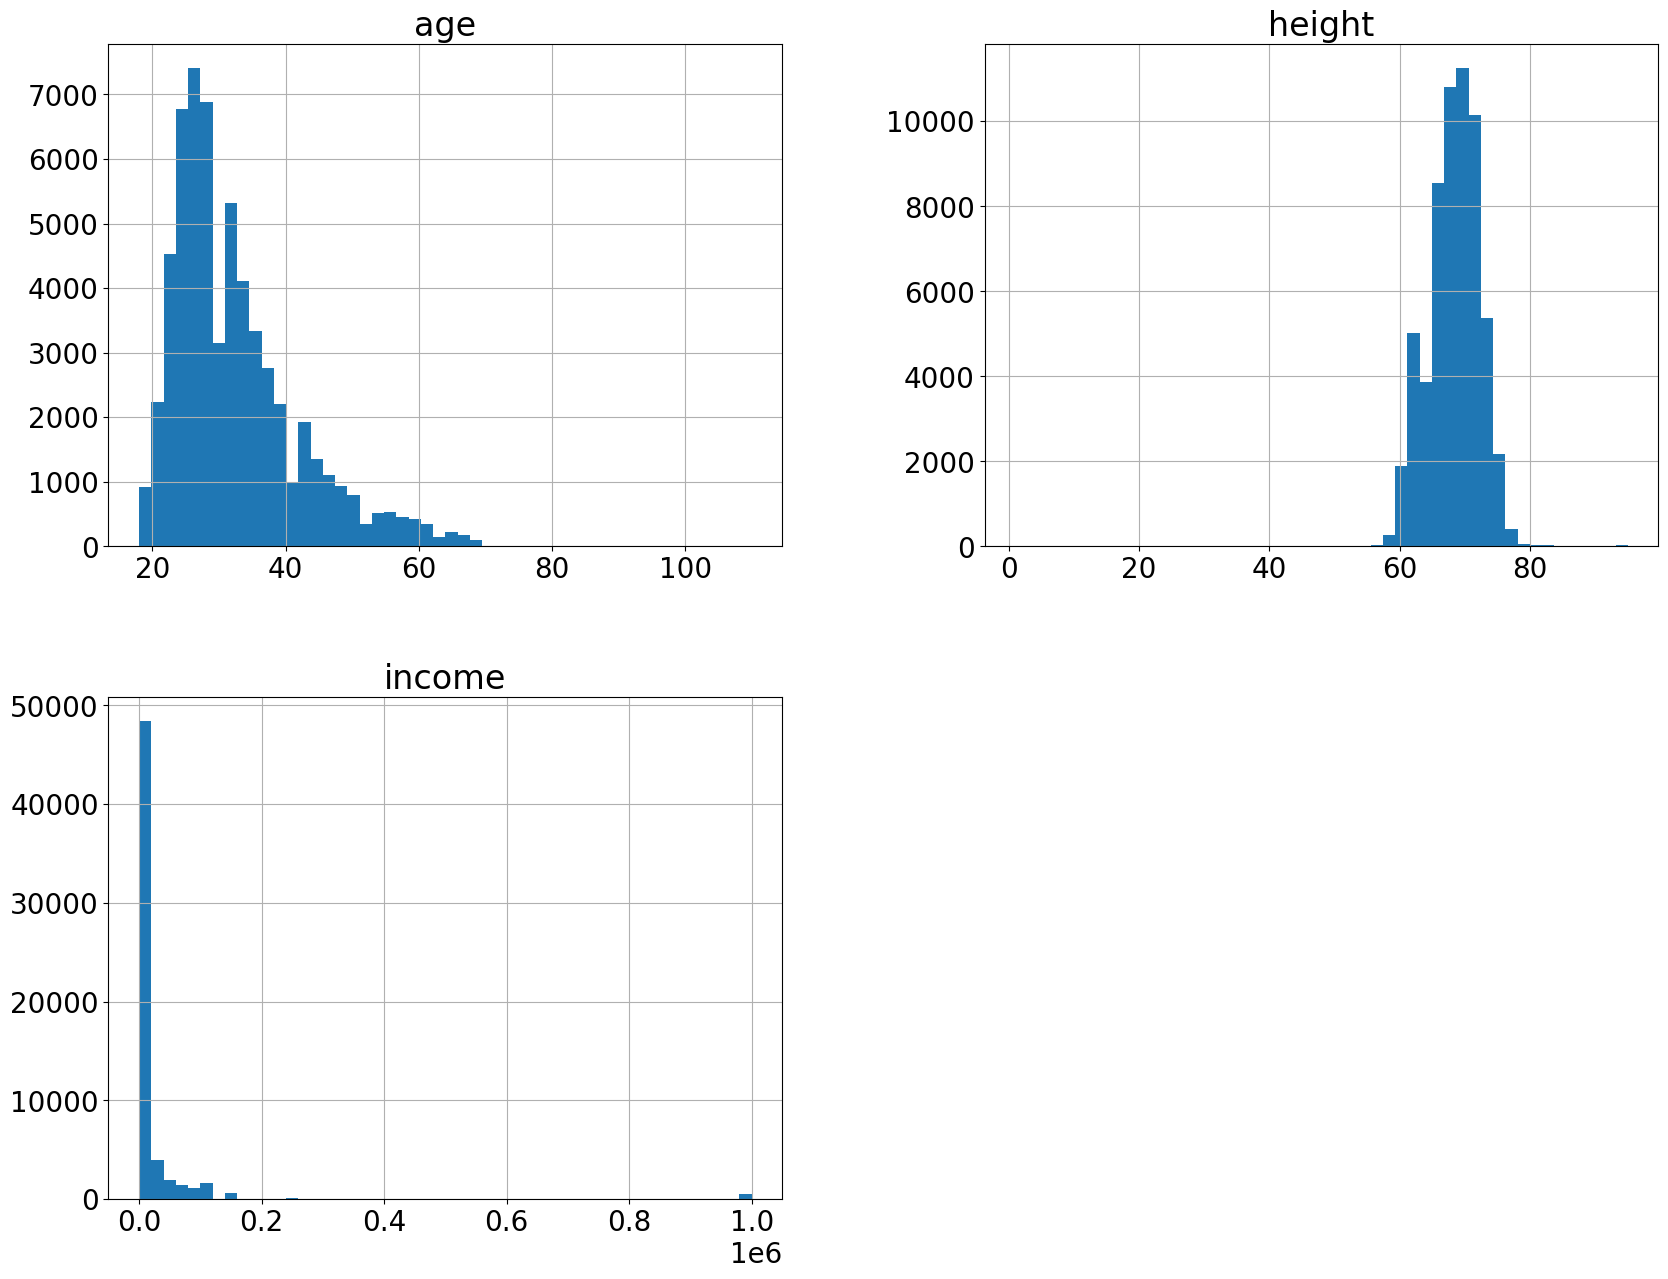

In [9]:
#Histogramy zbioru przed modyfikacjami
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

okcupid_original.hist(bins=50, figsize=(20,15))

plt.show()

In [10]:
#Statystki zbioru przed modyfikacjami
#Przegląd statystyk na kolumnach numerycznych
okcupid_original.describe()

age        height          income
count  59946.000000  59943.000000    59946.000000
mean      32.340290     68.295281    20033.222534
std        9.452779      3.994803    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000

In [11]:
#Przegląd statystyk na kolumnach nienumerycznych
import numpy as np

okcupid_original.describe(exclude=np.number)

status    sex orientation body_type             diet    drinks  drugs  \
count    59946  59946       59946     54650            35551     56961  45866   
unique       5      2           3        12               18         6      3   
top     single      m    straight   average  mostly anything  socially  never   
freq     55697  35829       51606     14652            16585     41780  37724   

                                education ethnicity    job  ... essay0  \
count                               53318     54266  51748  ...  54458   
unique                                 32       217     21  ...  54347   
top     graduated from college/university     white  other  ...      .   
freq                                23959     32831   7589  ...     12   

              essay1     essay2    essay3  essay4  essay5     essay6  \
count          52374      50308     48470   49409   49096      46175   
unique         51516      48625     43520   49257   48961      43583   
top     enjoying it.  listening  my smile  ask me  family  my future   
freq              61         82       529      16       6        161   

                  essay7  essay8        essay9  
count              47495   40721         47343  
unique             45548   39323         45440  
top     out with friends  ask me  you want to.  
freq                  89      45           200  

[4 rows x 28 columns]

In [12]:
#Ogólny przegląd zbioru

In [13]:
#Pomocnicze rozszerzenie wyświetlanej ilości kolumn
pd.set_option('display.max_columns', 31)

In [14]:
okcupid_original.head()

age     status sex orientation       body_type               diet  \
0   22     single   m    straight  a little extra  strictly anything   
1   35     single   m    straight         average       mostly other   
2   38  available   m    straight            thin           anything   
3   23     single   m    straight            thin         vegetarian   
4   29     single   m    straight        athletic                NaN   

     drinks      drugs                          education  \
0  socially      never      working on college/university   
1     often  sometimes              working on space camp   
2  socially        NaN     graduated from masters program   
3  socially        NaN      working on college/university   
4  socially      never  graduated from college/university   

             ethnicity  height  income                          job  \
0         asian, white    75.0      -1               transportation   
1                white    70.0   80000         hospitality / travel   
2                  NaN    68.0      -1                          NaN   
3                white    71.0   20000                      student   
4  asian, black, other    66.0      -1  artistic / musical / writer   

        last_online                         location  \
0  2012-06-28-20-30  south san francisco, california   
1  2012-06-29-21-41              oakland, california   
2  2012-06-27-09-10        san francisco, california   
3  2012-06-28-14-22             berkeley, california   
4  2012-06-27-21-26        san francisco, california   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                                     NaN                   has cats   
3                       doesn't want kids                 likes cats   
4                                     NaN  likes dogs and likes cats   

                                   religion  \
0     agnosticism and very serious about it   
1  agnosticism but not too serious about it   
2                                       NaN   
3                                       NaN   
4                                       NaN   

                                 sign     smokes  \
0                              gemini  sometimes   
1                              cancer         no   
2  pisces but it doesn&rsquo;t matter         no   
3                              pisces         no   
4                            aquarius         no   

                                              speaks  \
0                                            english   
1  english (fluently), spanish (poorly), french (...   
2                               english, french, c++   
3                           english, german (poorly)   
4                                            english   

                                              essay0  \
0  about me:  i would love to think that i was so...   
1  i am a chef: this is what that means. 1. i am ...   
2  i'm not ashamed of much, but writing public te...   
3          i work in a library and go to school. . .   
4  hey how's it going? currently vague on the pro...   

                                              essay1  \
0  currently working as an international agent fo...   
1  dedicating everyday to being an unbelievable b...   
2  i make nerdy software for musicians, artists, ...   
3          reading things written by old dead people   
4                         work work work work + play   

                                              essay2  \
0  making people laugh. ranting about a good salt...   
1  being silly. having ridiculous amonts of fun w...   
2  improvising in different contexts. alternating...   
3  playing synthesizers and organizing books acco...   
4  creating imagery to look at: http://bagsbrown....   

                                              essay3  \
0  the

In [164]:
#Definiowanie customowej funkcji do wyświetlania informacji o zbiorze danych
import pandas as pd

def print_dataframe_info(dataframe):
    info_df = pd.DataFrame({
        "Column Name": dataframe.columns,
        "Non-Null": dataframe.count(),
        "Dtype": dataframe.dtypes,
        "Uni. Val.": [dataframe[col].nunique() for col in dataframe.columns]
    })

    info_df = print(info_df.reset_index(drop=True))

    num_rows = len(dataframe)
    num_columns = len(dataframe.columns)

    rows_info = print("Number of rows: ", num_rows)
    columns_info = print("Number of columns: ", num_columns)

    return info_df, rows_info, columns_info

In [16]:
info_df = print_dataframe_info(okcupid_original)

    Column Name  Non-Null Count    Dtype  Unique Values
0           age           59946    int64             54
1        status           59946   object              5
2           sex           59946   object              2
3   orientation           59946   object              3
4     body_type           54650   object             12
5          diet           35551   object             18
6        drinks           56961   object              6
7         drugs           45866   object              3
8     education           53318   object             32
9     ethnicity           54266   object            217
10       height           59943  float64             60
11       income           59946    int64             13
12          job           51748   object             21
13  last_online           59946   object          30123
14     location           59946   object            199
15    offspring           24385   object             15
16         pets           40025   object        

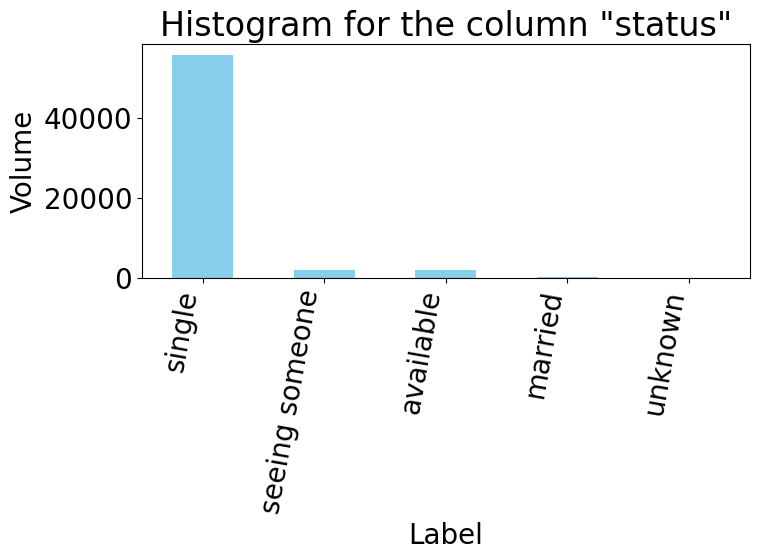

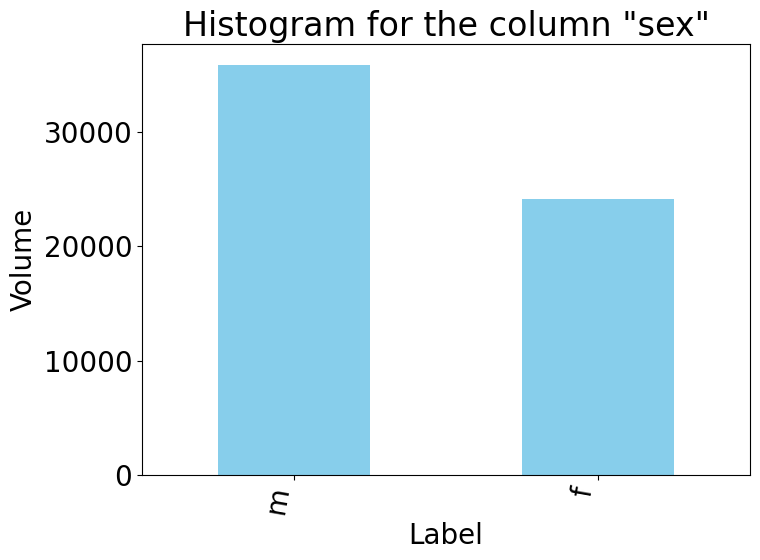

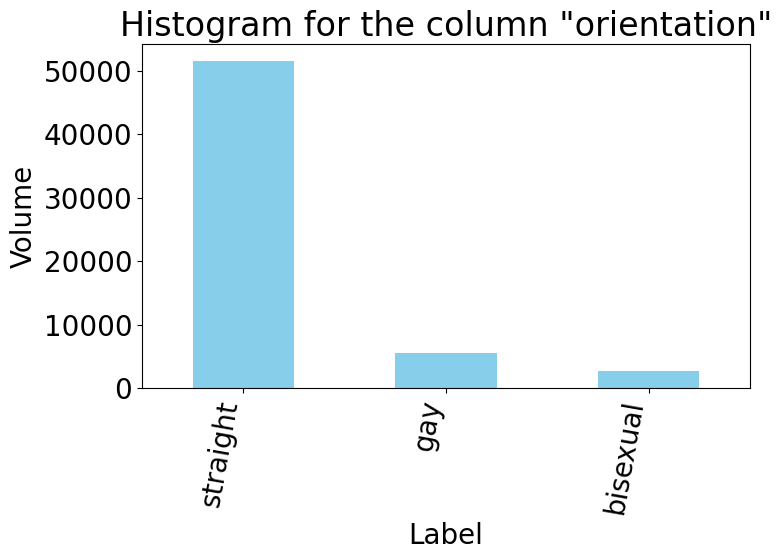

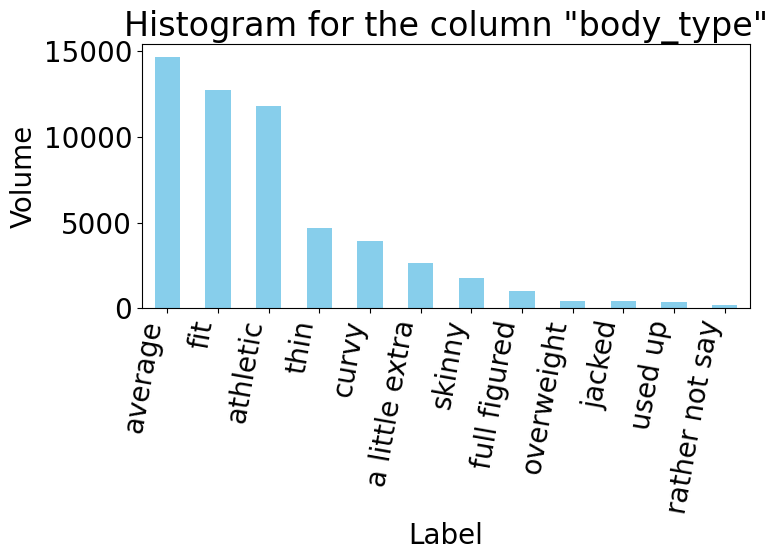

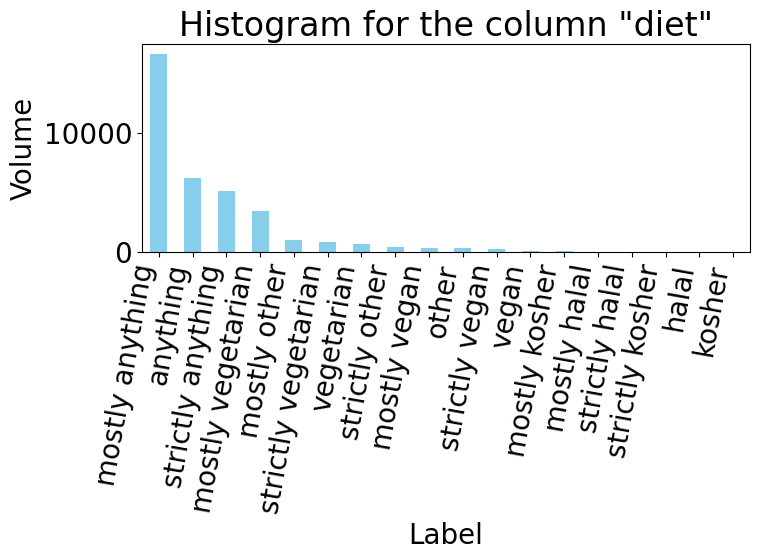

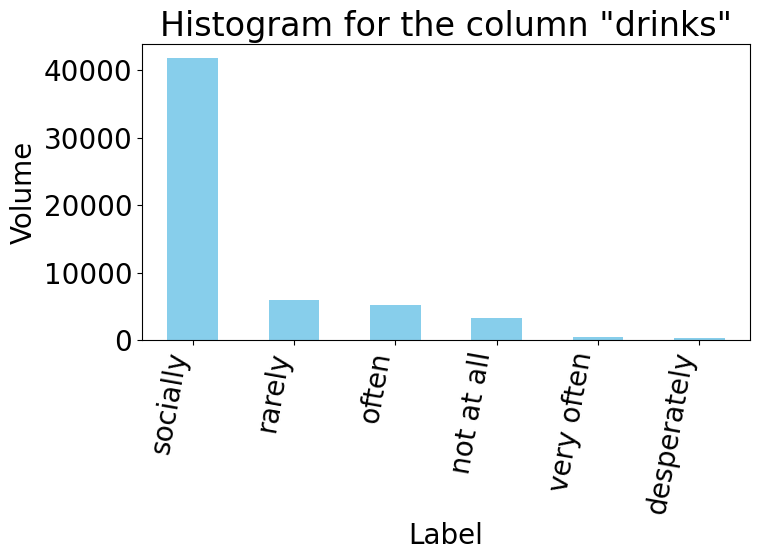

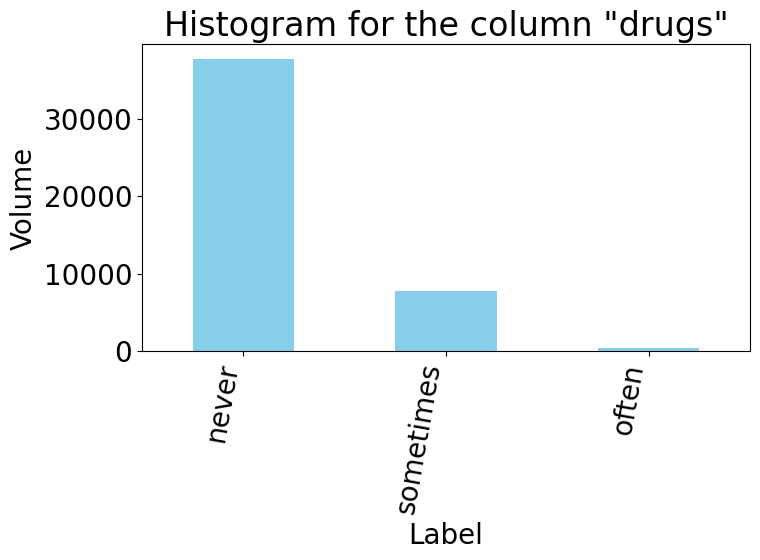

<ipython-input-17-a9b3d36ee08d>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


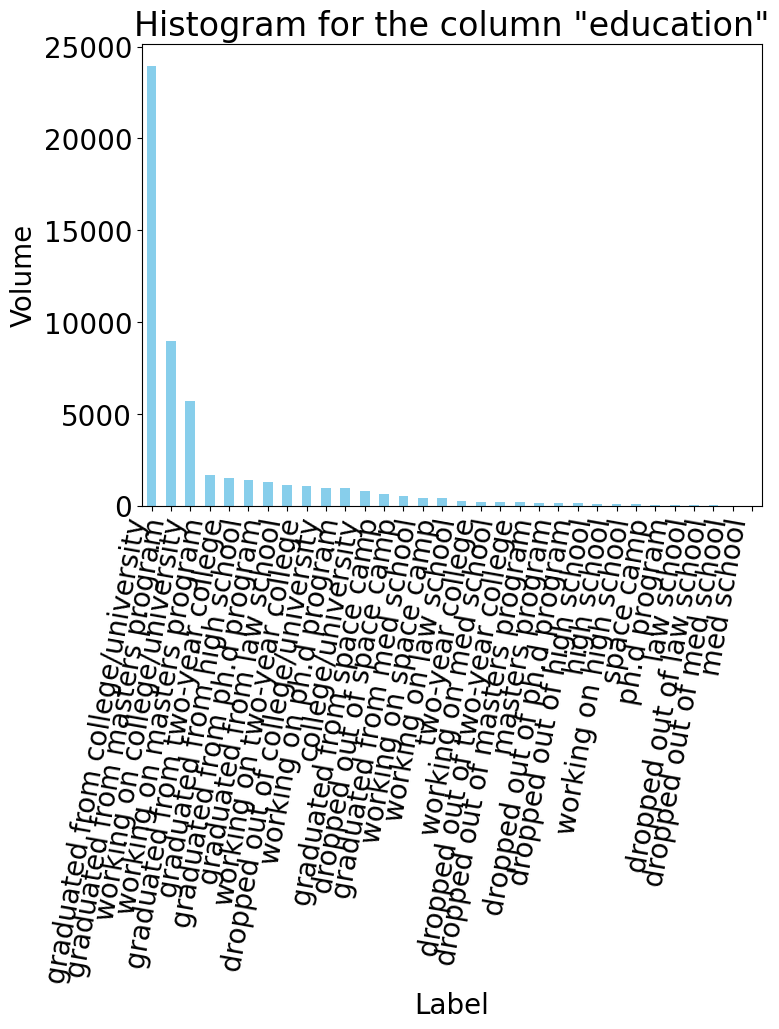

<ipython-input-17-a9b3d36ee08d>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


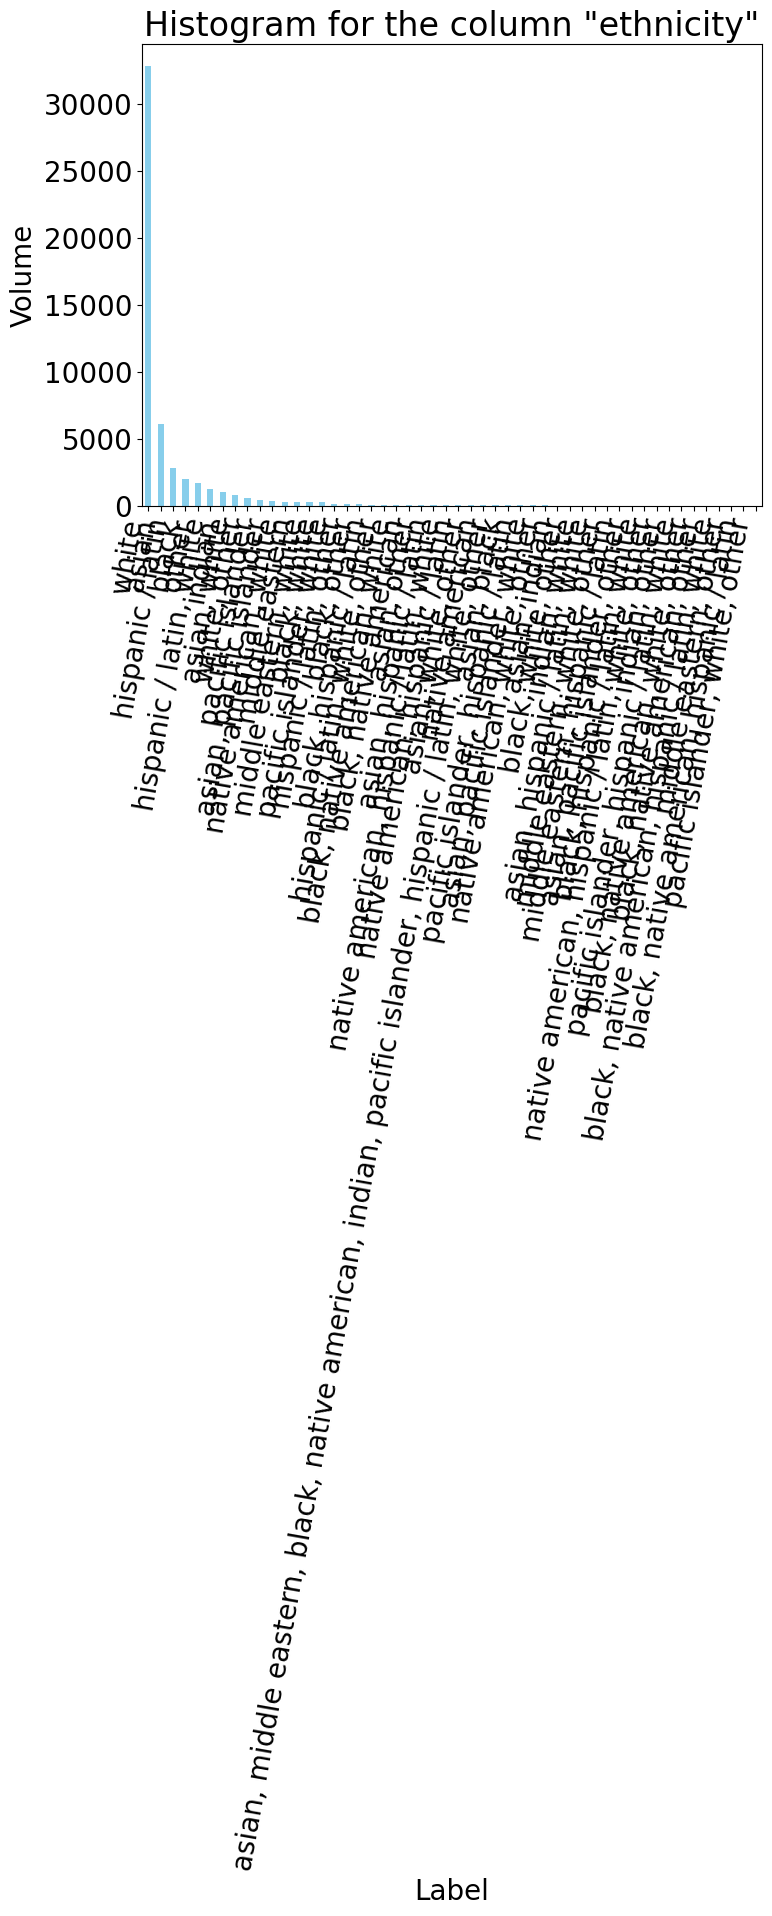

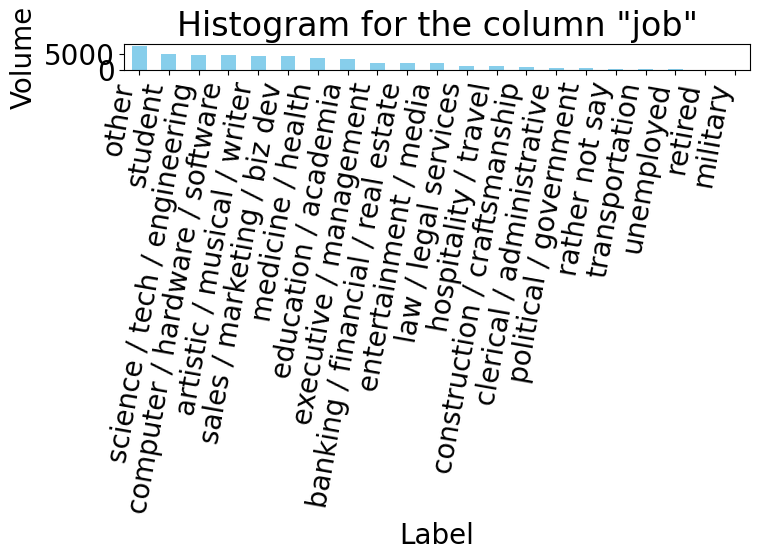

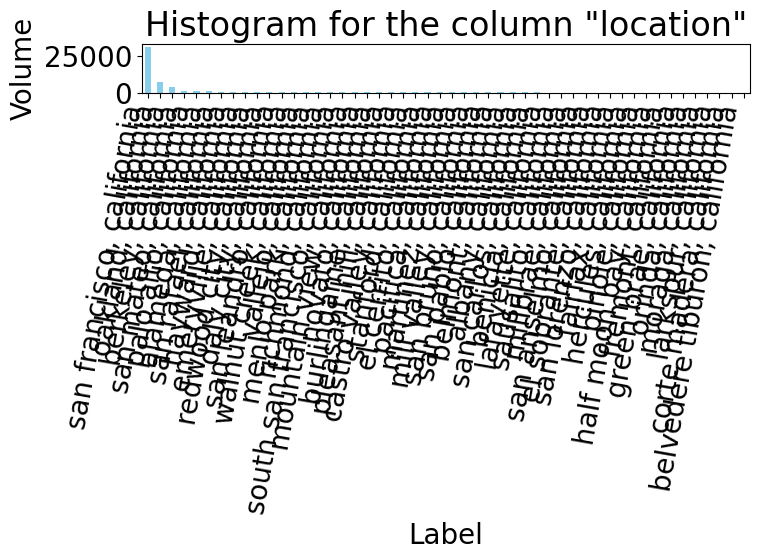

<ipython-input-17-a9b3d36ee08d>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


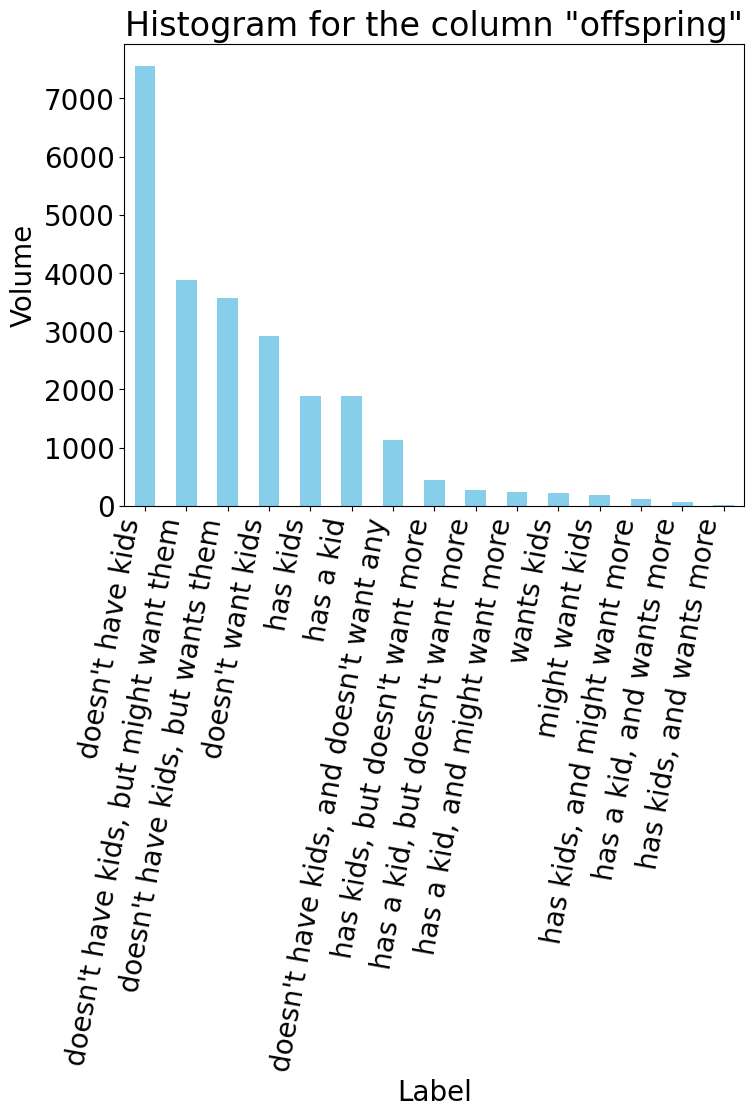

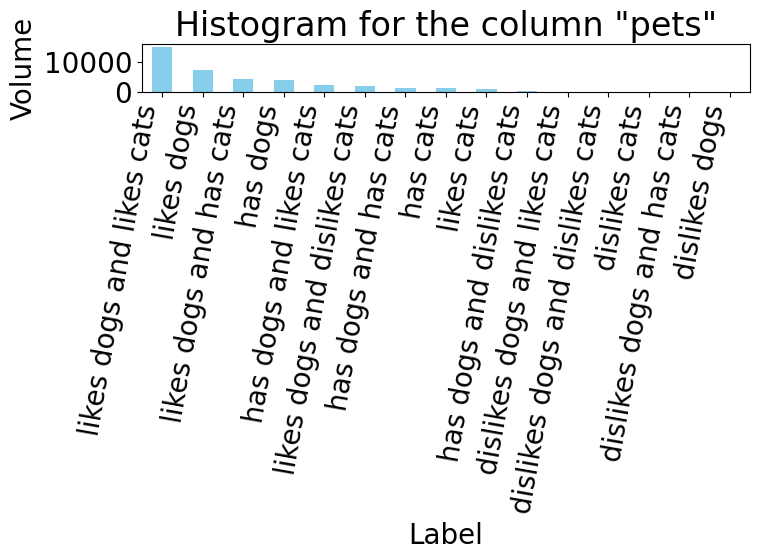

<ipython-input-17-a9b3d36ee08d>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


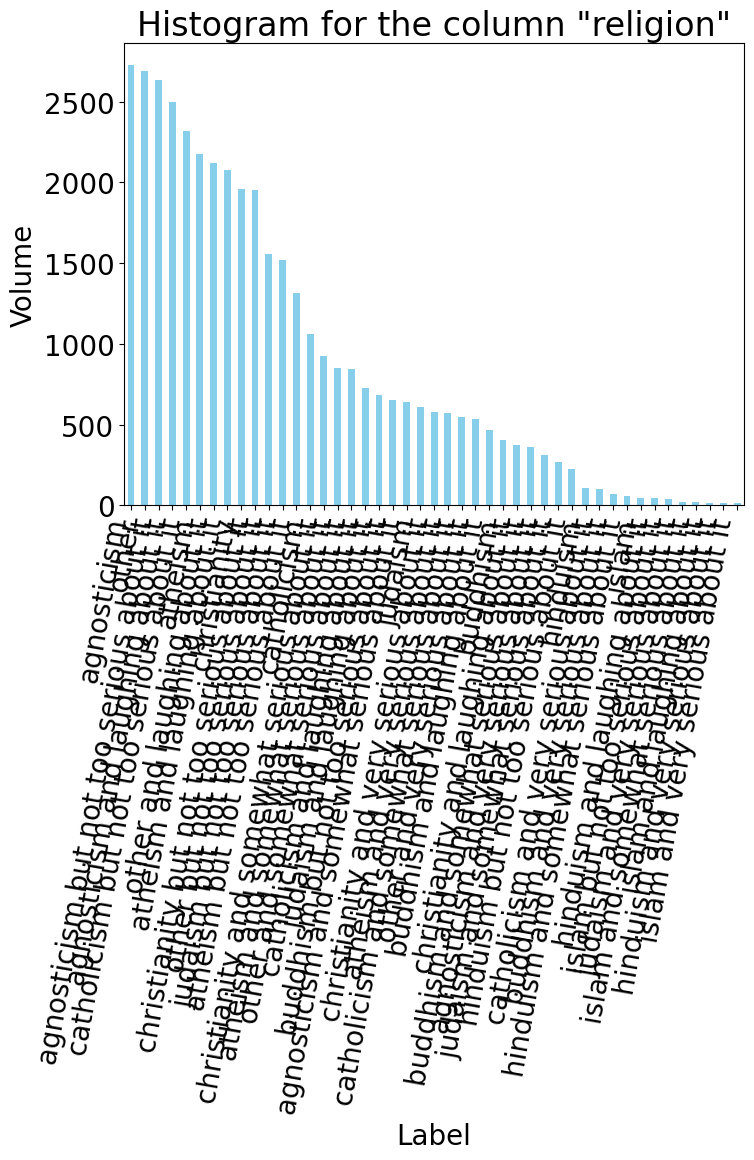

<ipython-input-17-a9b3d36ee08d>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


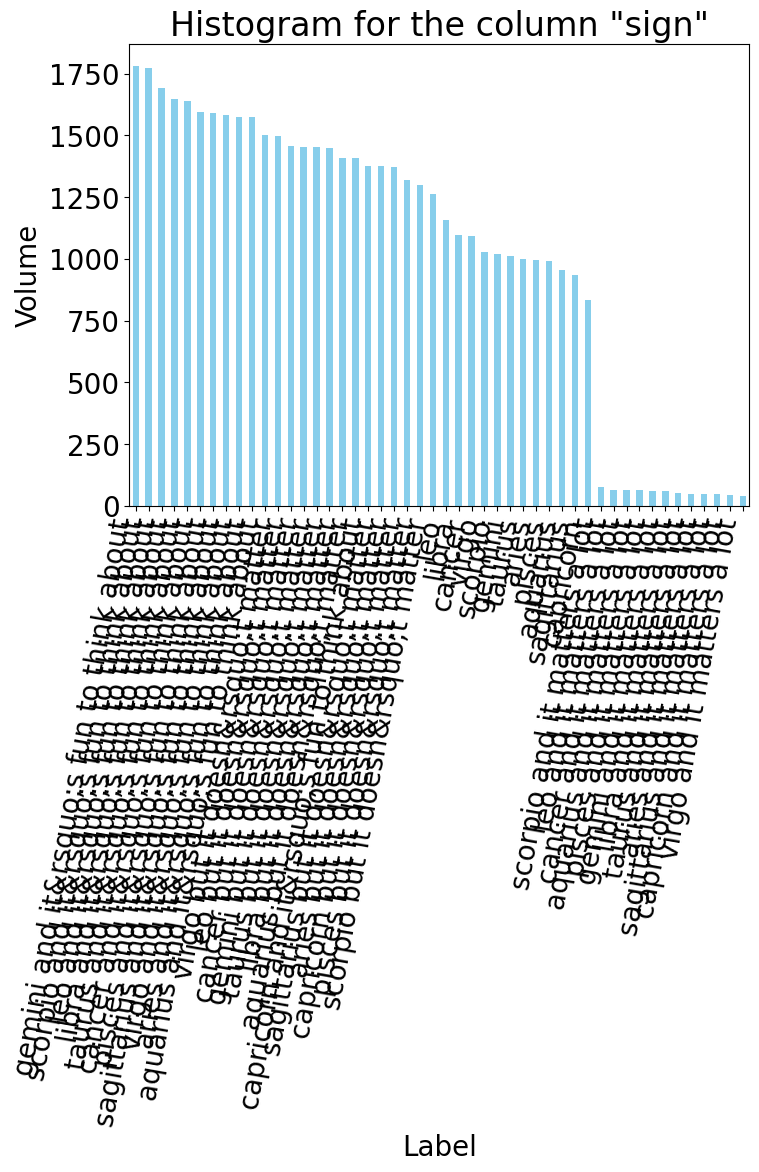

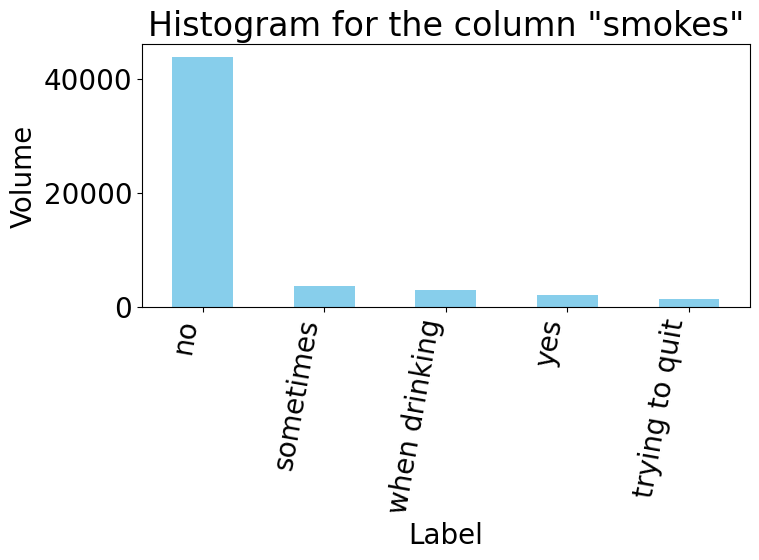

<ipython-input-17-a9b3d36ee08d>:24: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Dostosowanie układu


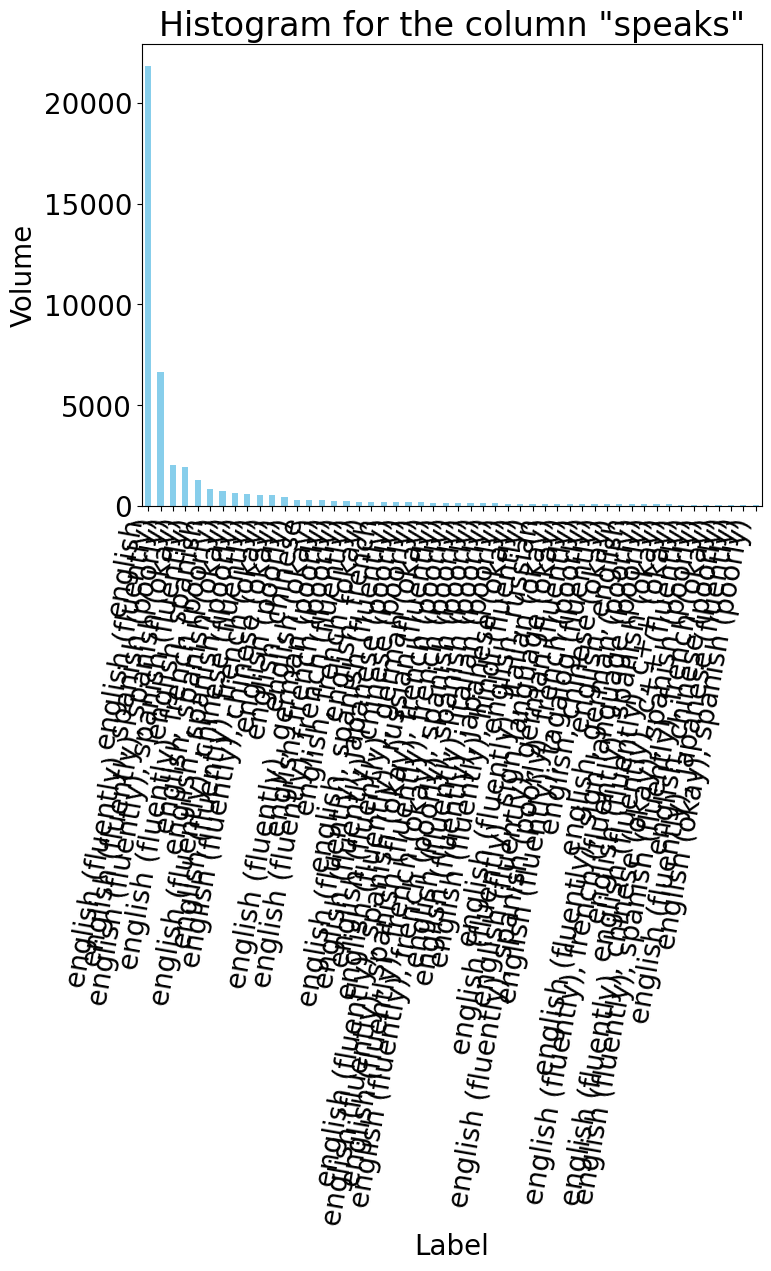

In [17]:
#Histogramy dla danych nienumerycznych
import matplotlib.pyplot as plt

#Wybierz kolumny typu 'object', które zawierają "essay" w nazwie
essay_columns = [col for col in okcupid_original.columns if 'essay' in col]

#Wybierz tylko kolumny, które nie zawierają "essay" w nazwie oraz pomijamy kolumnę '[last_online]'
object_columns = okcupid_original.select_dtypes(include=['object']).drop(columns=essay_columns + ['last_online'], errors='ignore')

#Tworzymy histogramy dla każdej z wybranych kolumn
#W przypadku, jeżeli mamy więcej niż 50 etykiet w danej kolumnie - pozostawiamy na wykresie tylko 50 najpopularniejszych
for column in object_columns.columns:
    plt.figure(figsize=(8, 6))
    if len(object_columns[column].unique()) <= 50:
        value_counts = object_columns[column].value_counts()
    else:
        value_counts = object_columns[column].value_counts()[:50]

    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Histogram for the column "{column}"')
    plt.xlabel('Label')
    plt.ylabel('Volume')
    plt.xticks(rotation=80, ha='right')  # Obrót etykiet osi X
    plt.tight_layout()  # Dostosowanie układu
    plt.show()

In [18]:
#4.2 Przegląd poszczególnych kolumn

In [19]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy
#Zostawienie ich tylko jako podgląd wartości, nie wyświetlanie wszystkich

pd.set_option('display.max_rows', 4)

In [20]:
#[age]
print(okcupid_original["age"].value_counts())
print("Dtype:", okcupid_original["age"].dtype)
print("Unique Values:", okcupid_original["age"].nunique())
print("Range:", okcupid_original["age"].min(), "-", okcupid_original["age"].max())

age
26     3724
27     3685
       ... 
110       1
109       1
Name: count, Length: 54, dtype: int64
Dtype: int64
Unique Values: 54
Range: 18 - 110


In [21]:
#[status]
print(okcupid_original["status"].value_counts())
print("Dtype:", okcupid_original["status"].dtype)
print("Unique Values:", okcupid_original["status"].nunique())

status
single            55697
seeing someone     2064
                  ...  
married             310
unknown              10
Name: count, Length: 5, dtype: int64
Dtype: object
Unique Values: 5


In [22]:
#[sex]
print(okcupid_original["sex"].value_counts())
print("Dtype:", okcupid_original["sex"].dtype)
print("Unique Values:", okcupid_original["sex"].nunique())

sex
m    35829
f    24117
Name: count, dtype: int64
Dtype: object
Unique Values: 2


In [23]:
#[orientation]
print(okcupid_original["orientation"].value_counts())
print("Dtype:", okcupid_original["orientation"].dtype)
print("Unique Values:", okcupid_original["orientation"].nunique())

orientation
straight    51606
gay          5573
bisexual     2767
Name: count, dtype: int64
Dtype: object
Unique Values: 3


In [24]:
#[body_type]
print(okcupid_original["body_type"].value_counts())
print("Dtype:", okcupid_original["body_type"].dtype)
print("Unique Values:", okcupid_original["body_type"].nunique())

body_type
average           14652
fit               12711
                  ...  
used up             355
rather not say      198
Name: count, Length: 12, dtype: int64
Dtype: object
Unique Values: 12


In [25]:
#[diet]
print(okcupid_original["diet"].value_counts())
print("Dtype:", okcupid_original["diet"].dtype)
print("Unique Values:", okcupid_original["diet"].nunique())

diet
mostly anything    16585
anything            6183
                   ...  
halal                 11
kosher                11
Name: count, Length: 18, dtype: int64
Dtype: object
Unique Values: 18


In [26]:
#[drinks]
print(okcupid_original["drinks"].value_counts())
print("Dtype:", okcupid_original["drinks"].dtype)
print("Unique Values:", okcupid_original["drinks"].nunique())

drinks
socially       41780
rarely          5957
               ...  
very often       471
desperately      322
Name: count, Length: 6, dtype: int64
Dtype: object
Unique Values: 6


In [27]:
#[drugs]
print(okcupid_original["drugs"].value_counts())
print("Dtype:", okcupid_original["drugs"].dtype)
print("Unique Values:", okcupid_original["drugs"].nunique())

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64
Dtype: object
Unique Values: 3


In [28]:
#[education]
print(okcupid_original["education"].value_counts())
print("Dtype:", okcupid_original["education"].dtype)
print("Unique Values:", okcupid_original["education"].nunique())

education
graduated from college/university    23959
graduated from masters program        8961
                                     ...  
dropped out of med school               12
med school                              11
Name: count, Length: 32, dtype: int64
Dtype: object
Unique Values: 32


In [29]:
#[ethnicity]
print(okcupid_original["ethnicity"].value_counts())
print("Dtype:", okcupid_original["ethnicity"].dtype)
print("Unique Values:", okcupid_original["ethnicity"].nunique())

ethnicity
white                                                                 32831
asian                                                                  6134
                                                                      ...  
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: count, Length: 217, dtype: int64
Dtype: object
Unique Values: 217


In [30]:
#[height]
print(okcupid_original["height"].value_counts())
print("Dtype:", okcupid_original["height"].dtype)
print("Unique Values:", okcupid_original["height"].nunique())
print("Range:", okcupid_original["height"].min(), "-", okcupid_original["height"].max())

height
70.0    6074
68.0    5449
        ... 
52.0       1
4.0        1
Name: count, Length: 60, dtype: int64
Dtype: float64
Unique Values: 60
Range: 1.0 - 95.0


In [31]:
#[income]
print(okcupid_original["income"].value_counts())
print("Dtype:", okcupid_original["income"].dtype)
print("Unique Values:", okcupid_original["income"].nunique())
print("Range:", okcupid_original["income"].min(), "-", okcupid_original["income"].max())

income
-1         48442
 20000      2952
           ...  
 250000      149
 500000       48
Name: count, Length: 13, dtype: int64
Dtype: int64
Unique Values: 13
Range: -1 - 1000000


In [32]:
#[job]
print(okcupid_original["job"].value_counts())
print("Dtype:", okcupid_original["job"].dtype)
print("Unique Values:", okcupid_original["job"].nunique())

job
other       7589
student     4882
            ... 
retired      250
military     204
Name: count, Length: 21, dtype: int64
Dtype: object
Unique Values: 21


In [33]:
#[last_online]
print(okcupid_original["last_online"].value_counts())
print("Dtype:", okcupid_original["last_online"].dtype)
print("Unique Values:", okcupid_original["last_online"].nunique())
print("Range:", okcupid_original["last_online"].min(), "-", okcupid_original["last_online"].max())

last_online
2012-06-29-22-56    24
2012-06-30-21-51    23
                    ..
2012-05-31-19-01     1
2012-06-14-16-51     1
Name: count, Length: 30123, dtype: int64
Dtype: object
Unique Values: 30123
Range: 2011-06-27-01-52 - 2012-07-01-08-57


In [34]:
#[location]
print(okcupid_original["location"].value_counts())
print("Dtype:", okcupid_original["location"].dtype)
print("Unique Values:", okcupid_original["location"].nunique())

location
san francisco, california    31064
oakland, california           7214
                             ...  
london, united kingdom           1
rochester, michigan              1
Name: count, Length: 199, dtype: int64
Dtype: object
Unique Values: 199


In [35]:
#[offspring]
print(okcupid_original["offspring"].value_counts())
print("Dtype:", okcupid_original["offspring"].dtype)
print("Unique Values:", okcupid_original["offspring"].nunique())

offspring
doesn't have kids                         7560
doesn't have kids, but might want them    3875
                                          ... 
has a kid, and wants more                   71
has kids, and wants more                    21
Name: count, Length: 15, dtype: int64
Dtype: object
Unique Values: 15


In [36]:
#[pets]
print(okcupid_original["pets"].value_counts())
print("Dtype:", okcupid_original["pets"].dtype)
print("Unique Values:", okcupid_original["pets"].nunique())

pets
likes dogs and likes cats     14814
likes dogs                     7224
                              ...  
dislikes dogs and has cats       81
dislikes dogs                    44
Name: count, Length: 15, dtype: int64
Dtype: object
Unique Values: 15


In [37]:
#[religion]
print(okcupid_original["religion"].value_counts())
print("Dtype:", okcupid_original["religion"].dtype)
print("Unique Values:", okcupid_original["religion"].nunique())

religion
agnosticism                           2724
other                                 2691
                                      ... 
hinduism and very serious about it      14
islam and very serious about it         13
Name: count, Length: 45, dtype: int64
Dtype: object
Unique Values: 45


In [38]:
#[sign]
print(okcupid_original["sign"].value_counts())
print("Dtype:", okcupid_original["sign"].dtype)
print("Unique Values:", okcupid_original["sign"].nunique())

sign
gemini and it&rsquo;s fun to think about     1782
scorpio and it&rsquo;s fun to think about    1772
                                             ... 
capricorn and it matters a lot                 45
virgo and it matters a lot                     41
Name: count, Length: 48, dtype: int64
Dtype: object
Unique Values: 48


In [39]:
#[smokes]
print(okcupid_original["smokes"].value_counts())
print("Dtype:", okcupid_original["smokes"].dtype)
print("Unique Values:", okcupid_original["smokes"].nunique())

smokes
no                43896
sometimes          3787
                  ...  
yes                2231
trying to quit     1480
Name: count, Length: 5, dtype: int64
Dtype: object
Unique Values: 5


In [40]:
#[speaks]
print(okcupid_original["speaks"].value_counts())
print("Dtype:", okcupid_original["speaks"].dtype)
print("Unique Values:", okcupid_original["speaks"].nunique())

speaks
english                                                             21828
english (fluently)                                                   6628
                                                                    ...  
english (fluently), french (okay), italian (okay), hebrew (okay)        1
english (fluently), french, farsi                                       1
Name: count, Length: 7647, dtype: int64
Dtype: object
Unique Values: 7647


In [41]:
#[essay0]
#print(okcupid_original["essay0"].value_counts())
print("Dtype:", okcupid_original["essay0"].dtype)
print("Unique Values:", okcupid_original["essay0"].nunique())

Dtype: object
Unique Values: 54347


In [42]:
#[essay1]
#print(okcupid_original["essay1"].value_counts())
print("Dtype:", okcupid_original["essay1"].dtype)
print("Unique Values:", okcupid_original["essay1"].nunique())

Dtype: object
Unique Values: 51516


In [43]:
#[essay2]
#print(okcupid_original["essay2"].value_counts())
print("Dtype:", okcupid_original["essay2"].dtype)
print("Unique Values:", okcupid_original["essay2"].nunique())

Dtype: object
Unique Values: 48625


In [ ]:
#[essay3]
#print(okcupid_original["essay3"].value_counts())
print("Dtype:", okcupid_original["essay3"].dtype)
print("Unique Values:", okcupid_original["essay3"].nunique())

In [45]:
#[essay4]
#print(okcupid_original["essay4"].value_counts())
print("Dtype:", okcupid_original["essay4"].dtype)
print("Unique Values:", okcupid_original["essay4"].nunique())

Dtype: object
Unique Values: 49257


In [46]:
#[essay5]
#print(okcupid_original["essay5"].value_counts())
print("Dtype:", okcupid_original["essay5"].dtype)
print("Unique Values:", okcupid_original["essay5"].nunique())

Dtype: object
Unique Values: 48961


In [47]:
#[essay6]
#print(okcupid_original["essay6"].value_counts())
print("Dtype:", okcupid_original["essay6"].dtype)
print("Unique Values:", okcupid_original["essay6"].nunique())

Dtype: object
Unique Values: 43583


In [48]:
#[essay7]
#print(okcupid_original["essay7"].value_counts())
print("Dtype:", okcupid_original["essay7"].dtype)
print("Unique Values:", okcupid_original["essay7"].nunique())

Dtype: object
Unique Values: 45548


In [49]:
#[essay8]
#print(okcupid_original["essay8"].value_counts())
print("Dtype:", okcupid_original["essay8"].dtype)
print("Unique Values:", okcupid_original["essay8"].nunique())

Dtype: object
Unique Values: 39323


In [50]:
#[essay9]
#print(okcupid_original["essay9"].value_counts())
print("Dtype:", okcupid_original["essay9"].dtype)
print("Unique Values:", okcupid_original["essay9"].nunique())

Dtype: object
Unique Values: 45440


In [51]:
#Kopiowanie zbioru danych przed rozpoczęciem operacji na nich
okcupid = okcupid_original.copy()

In [52]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy
#Przywrócenie do pierwotnego stanu

pd.set_option('display.max_rows', None)

In [53]:
#4.3 Usunięcia kolumn

In [54]:
#Lista kolumn do usunięcia
columns_to_drop = ['ethnicity', 'height', 'income', 'last_online', 'location', 'sign', 'speaks', 'essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

In [55]:
#Usunięcie kolumn
okcupid.drop(columns=columns_to_drop, inplace=True)

In [56]:
info_df = print_dataframe_info(okcupid)

    Column Name  Non-Null Count   Dtype  Unique Values
0           age           59946   int64             54
1        status           59946  object              5
2           sex           59946  object              2
3   orientation           59946  object              3
4     body_type           54650  object             12
5          diet           35551  object             18
6        drinks           56961  object              6
7         drugs           45866  object              3
8     education           53318  object             32
9           job           51748  object             21
10    offspring           24385  object             15
11         pets           40025  object             15
12     religion           39720  object             45
13       smokes           54434  object              5
Number of rows:  59946
Number of columns:  14


In [57]:
#4.4 Usunięcia wierszy z niepożądanymi wartościami

In [58]:
#Słownik z wierszami do usunięcia, gdzie kluczami są nazwy kolumn, a wartości to listy wartości do usunięcia
rows_to_drop = {'status': ['married', 'unknown'], 'orientation': ['bisexual', 'gay']}

In [59]:
#Usunięcie wierszy (nadpisanie zbioru)
for column, values in rows_to_drop.items():
    okcupid = okcupid[~okcupid[column].isin(values)]

In [60]:
#Sprawdzenie poprawności wykonania operacji - status
print(okcupid["status"].value_counts())
print("Dtype:", okcupid["status"].dtype)
print("Unique Values:", okcupid["status"].nunique())

status
single            48710
seeing someone     1490
available          1172
Name: count, dtype: int64
Dtype: object
Unique Values: 3


In [61]:
#Sprawdzenie poprawności wykonania operacji - orientation
print(okcupid["orientation"].value_counts())
print("Dtype:", okcupid["orientation"].dtype)
print("Unique Values:", okcupid["orientation"].nunique())

orientation
straight    51372
Name: count, dtype: int64
Dtype: object
Unique Values: 1


In [62]:
#4.5 Wartości odstające

In [63]:
#Lista kolumn do badania wartości odstających
columns_check_outliers = ['age']

In [64]:
import matplotlib.pyplot as plt

def plot_outliers(dataframe, columns):
    for column in columns:
        plt.figure(figsize=(8, 6))
        plt.plot(dataframe[column], marker='o', linestyle='None', color='blue', markersize=3)
        plt.title(f'Value of column"{column}"')
        plt.xlabel('Index')
        plt.ylabel(f'Value {column}')
        plt.grid(True)
        plt.show()

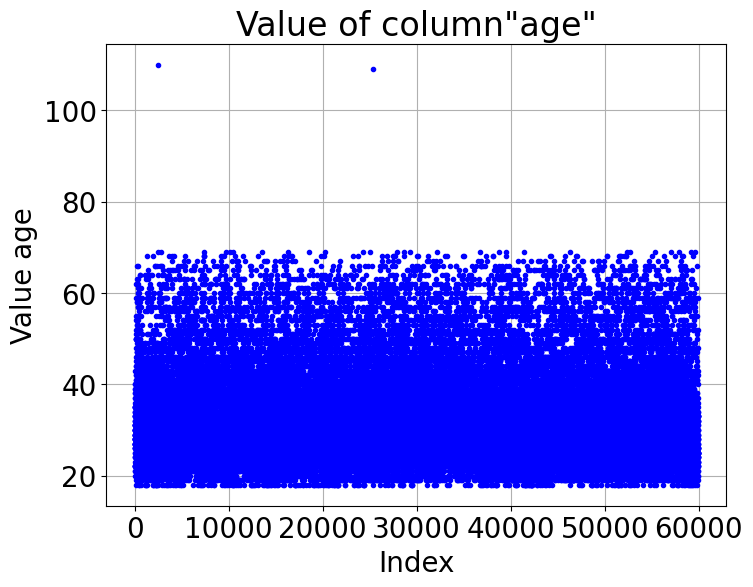

In [65]:
plot_outliers(okcupid, columns_check_outliers)

In [66]:
# Wyświetlenie wierszy, w których wartość kolumny "age" przekracza 100
print(okcupid[okcupid['age'] > 100])

       age     status sex orientation body_type          diet drinks  drugs  \
2512   110     single   f    straight       NaN           NaN    NaN    NaN   
25324  109  available   m    straight  athletic  mostly other    NaN  never   

                        education      job        offspring pets  \
2512                          NaN      NaN              NaN  NaN   
25324  working on masters program  student  might want kids  NaN   

                                  religion         smokes  
2512                                   NaN            NaN  
25324  other and somewhat serious about it  when drinking  


In [67]:
#Usunięcie wierszy (nadpisanie zbioru), w których wartość kolumny "age" przekracza 100
okcupid = okcupid[okcupid['age'] <= 100]

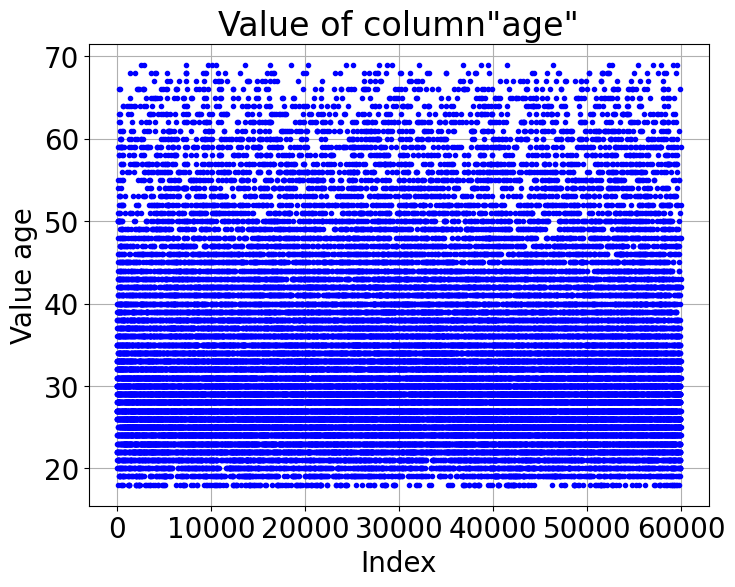

In [68]:
plot_outliers(okcupid, columns_check_outliers)

In [69]:
#4.6 Wartości NaN

In [70]:
#Definiowanie customowej funkcji do wyświetlania informacji o wartościach NaN

def print_nan_count_info(dataframe):
    nan_count_series = dataframe.isna().sum()
    info_df = pd.DataFrame({
        "Column Name": nan_count_series.index,
        "Dtype": dataframe.dtypes,
        "NaN Count": nan_count_series.values
    })

    info_df = print(info_df.reset_index(drop=True))

    nan_count = dataframe.isna().sum().sum()

    nan_info = print("Number of NaN values in the dataset:", nan_count)

    return info_df, nan_info

In [71]:
#Sprawdzanie ilości NaN w poszczególnych kolumnach oraz całościowo zbiorze
info_nan_df = print_nan_count_info(okcupid)

    Column Name   Dtype  NaN Count
0           age   int64          0
1        status  object          0
2           sex  object          0
3   orientation  object          0
4     body_type  object       4386
5          diet  object      20427
6        drinks  object       2591
7         drugs  object      12018
8     education  object       5613
9           job  object       6916
10    offspring  object      29866
11         pets  object      17471
12     religion  object      17526
13       smokes  object       4803
Number of NaN values in the dataset: 121617


In [72]:
#Lista kolumn do uzupełnienia wartości NaN
columns_to_replace_nan = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'job', 'offspring', 'pets', 'religion', 'smokes']

In [73]:
#Definiowanie customowej funkcji do uzupełniania wartości NaN za pomocą strategii most_frequent

from sklearn.impute import SimpleImputer

def replace_nan_with_most_frequent(dataframe, columns):
    #Inicjalizacja klasy SimpleImputer
    imputer = SimpleImputer(strategy='most_frequent')
    #Dopasowanie imputera do danych i ich transformacja
    imputed_data = imputer.fit_transform(dataframe[columns])
    dataframe[columns] = imputed_data

    for column in columns:
        most_frequent_value = imputer.statistics_[columns.index(column)]
        print(f"The most frequent value in the column '{column}': {most_frequent_value}")

    return dataframe

In [74]:
#Uzupełnienie kolumn z wartościami NaN
okcupid = replace_nan_with_most_frequent(okcupid, columns_to_replace_nan)

The most frequent value in the column 'body_type': average
The most frequent value in the column 'diet': mostly anything
The most frequent value in the column 'drinks': socially
The most frequent value in the column 'drugs': never
The most frequent value in the column 'education': graduated from college/university
The most frequent value in the column 'job': other
The most frequent value in the column 'offspring': doesn't have kids
The most frequent value in the column 'pets': likes dogs and likes cats
The most frequent value in the column 'religion': agnosticism
The most frequent value in the column 'smokes': no


In [75]:
#Sprawdzanie ilości NaN w poszczególnych kolumnach oraz całościowo zbiorze po przekształceniach
info_nan_df = print("Number of NaN values in the dataset:", okcupid.isna().sum().sum())

Number of NaN values in the dataset: 0


In [76]:
#Checkpoint - kopiowanie danych przed rozpoczęciem operacji kodowań
okcupid1 = okcupid.copy()

In [79]:
#4.7 One-hot encoding

In [80]:
#Lista kolumn do One-hot encoding
columns_to_one_hot = ['sex', 'orientation','status', 'education', 'job']

In [81]:
#Uzupełnienie kolumn za pomocą One-hot encoding
for column in columns_to_one_hot:
    okcupid1 = pd.get_dummies(okcupid1, columns=[column])

In [82]:
#Sprawdzenie zmian na zbiorze
print(okcupid1.head())

   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False   True   
1  agnosticism but not too

In [84]:
#4.8 One-hot encoding po rozdzieleniu treści

In [85]:
#Ze względu na złożoność przypadków każdy z nich zostanie rozpatrzony indywidualnie.

In [ ]:
#[diet]
#Dokładne sprawdzenie wartości
print(okcupid_original["diet"].value_counts())

In [87]:
import numpy as np

#Typy diet dostępne w zbiorze
diet_types = ['anything', 'vegetarian', 'vegan', 'kosher', 'halal', 'other']

#Przetwarzanie diety na 2 odrębne cechy
def process_diet(diet):
    is_serious_about_diet = True if 'strictly' in diet else False #Sprawdzenie występowania "strictly" w diecie
    diet_type = None
    for word in diet.split():
        if word in diet_types:
            diet_type = word
            break

    return is_serious_about_diet, diet_type

In [88]:
#Zastosowanie funkcji
okcupid1['is_serious_about_diet'], okcupid1['diet_type'] = zip(*okcupid1['diet'].apply(process_diet))

In [ ]:
print("After splitting the [diet] column")
print(okcupid1.head())

In [90]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['diet_type'])

In [ ]:
print("After One-hot encoding the [diet] column")
print(okcupid1.head())

In [ ]:
#[religion]
#Dokładne sprawdzenie wartości
print(okcupid_original["religion"].value_counts())

In [93]:
#Typy religii dostępne w zbiorze
religion_types = ['agnosticism', 'other', 'agnosticism', 'catholicism', 'atheism', 'christianity', 'judaism', 'buddhism', 'hinduism', 'islam']

#Przetwarzanie religii na 2 odrębne cechy
def process_religion(religion):
    is_serious_about_religion = True if 'somewhat serious about it' in religion or 'very serious about it' in religion else False
    religion_type = None
    for word in religion.split():
        if word in religion_types:
            religion_type = word
            break

    return is_serious_about_religion, religion_type

In [94]:
#Zastosowanie funkcji
okcupid1['is_serious_about_religion'], okcupid1['religion_type'] = zip(*okcupid1['religion'].apply(process_religion))

In [ ]:
print("After splitting the [religion] column")
print(okcupid1.head())

In [96]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['religion_type'])

In [ ]:
print("After One-hot encoding the [religion] column")
print(okcupid1.head())

In [98]:
#[offspring]
#Dokładne sprawdzenie wartości
print(okcupid_original["offspring"].value_counts())

offspring
doesn't have kids                          7560
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: count, dtype: int64


In [99]:
#Przetwarzanie potomstwa na 2 odrębne cechy
def process_offspring(offspring):
    want_kids = False if "doesn't want" in offspring else True  #Sprawdzenie występowania 3 kombinacji "doesn't want": kids, more, any
    has_kids = True if 'has kids' in offspring or 'has a kid' in offspring else False  #Sprawdzenie występowania 'has kids' lub 'has a kid'

    return has_kids, want_kids

In [100]:
#Zastosowanie funkcji
okcupid1['want_kids'], okcupid1['has_kids'] = zip(*okcupid1['offspring'].apply(process_offspring))

In [ ]:
print("After splitting the [offspring] column")
print(okcupid1.head())

In [ ]:
#[pets]
#Dokładne sprawdzenie wartości
print(okcupid1["pets"].value_counts())

In [103]:
#Przetwarzanie zwierząt na 4 odrębne cechy
def process_pets(pets):
    has_dogs = True if 'has dogs' in pets else False
    has_cats = True if 'has cats' in pets else False
    likes_dogs = False if "dislikes dogs" in pets else True
    likes_cats = False if "dislikes cats" in pets else True

    return likes_dogs, likes_cats, has_dogs, has_cats

In [104]:
#Zastosowanie fukncji
okcupid1['likes_dogs'], okcupid1['likes_cats'], okcupid1['has_dogs'], okcupid1['has_cats'] = zip(*okcupid1['pets'].apply(process_pets))

In [105]:
print("After splitting the [pets] column")
print(okcupid1.head())

After splitting the [pets] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False   

In [ ]:
#[body_type]
#Dokładne sprawdzenie wartości
print(okcupid_original["body_type"].value_counts())

In [119]:
#Typy sylwetek dostępne w zbiorze, podzielone na wstępne kategorie
body_type_categories = {
    "athletic": ["athletic", "fit", "average"],
    "slim": ["thin", "skinny"],
    "curvy": ["a little extra", "curvy", "full figured"],
    "overweight": ["overweight", "jacked", "used up", "rather not say"]
}

In [121]:
#Przetwarzanie typu sylwetki na 4 odrębne cechy
def process_body_type(body_type):
    body_type_processed = None
    for category, synonyms in body_type_categories.items():
        if body_type in synonyms:
            body_type_processed = category
            break

    return body_type_processed

In [122]:
#Zastosowanie funkcji
okcupid1['body_type_processed'] =  okcupid1['body_type'].apply(process_body_type)

In [ ]:
print("After changing the [body_type] column")
print(okcupid1.head())

In [124]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['body_type_processed'])

In [125]:
print("After One-hot encoding the [body_type_processed] column")
print(okcupid1.head())

After One-hot encoding the [body_type_processed] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about i

In [126]:
#[drinks]
#Dokładne sprawdzenie wartości
print(okcupid_original["drinks"].value_counts())

drinks
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: count, dtype: int64


In [128]:
#Stosunki do alkoholu dostępne w zbiorze, podzielone na wstępne kategorie
drinks_categories = {
    "not at all": ["not at all"],
    "sometimes": ["socially", "rarely"],
    "often": ["often", "very often", "desperately"]
}

In [129]:
#Przetwarzanie stosunków do alkoholu na 3 odrębne cechy
def process_drinks(drinks):
    drinks_processed = None
    for category, synonyms in drinks_categories.items():
        if drinks in synonyms:
            drinks_processed = category
            break

    return drinks_processed

In [130]:
#Zastosowanie funkcji
okcupid1['drinks_processed'] =  okcupid1['drinks'].apply(process_drinks)

In [131]:
print("After changing the [drinks] column")
print(okcupid1.head())

After changing the [drinks] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False  

In [132]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['drinks_processed'])

In [133]:
print("After One-hot encoding the [drinks_processed] column")
print(okcupid1.head())

After One-hot encoding the [drinks_processed] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  

In [134]:
#[drugs]
#Dokładne sprawdzenie wartości
print(okcupid_original["drugs"].value_counts())

drugs
never        37724
sometimes     7732
often          410
Name: count, dtype: int64


In [136]:
#Stosunki do narkotyków dostępne w zbiorze, podzielone na wstępne kategorie
drugs_categories = {
    "never": ["never"],
    "sometimes": ["sometimes"],
    "often": ["often"]
}

In [137]:
#Przetwarzanie typu sylwetki na 4 odrębne cechy
def process_drugs(drugs):
    drugs_processed = None
    for category, synonyms in drugs_categories.items():
        if drugs in synonyms:
            drugs_processed = category
            break

    return drugs_processed

In [140]:
#Zastosowanie funkcji
okcupid1['drugs_processed'] =  okcupid1['drugs'].apply(process_drugs)

In [141]:
print("After changing the [drugs] column")
print(okcupid1.head())

After changing the [drugs] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False   

In [142]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['drugs_processed'])

In [143]:
print("After One-hot encoding the [drugs_processed] column")
print(okcupid1.head())

After One-hot encoding the [drugs_processed] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  s

In [144]:
#[smokes]
#Dokładne sprawdzenie wartości
print(okcupid_original["smokes"].value_counts())

smokes
no                43896
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: count, dtype: int64


In [145]:
#Stosunki do palenia dostępne w zbiorze, podzielone na wstępne kategorie
smokes_categories = {
            "no": ["no"],
            "sometimes": ["sometimes", "when drinking", "trying to quit"],
            "yes": ["yes"]
}

In [146]:
#Przetwarzanie typu sylwetki na 4 odrębne cechy
def process_smokes(smokes):
    smokes_processed = None
    for category, synonyms in smokes_categories.items():
        if smokes in synonyms:
            smokes_processed = category
            break

    return smokes_processed

In [147]:
#Zastosowanie funkcji
okcupid1['smokes_processed'] =  okcupid1['smokes'].apply(process_smokes)

In [148]:
print("After changing the [smokes] column")
print(okcupid1.head())

After changing the [smokes] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  sometimes  False  

In [149]:
#Uzupełnienie kolumn za pomocą One-hot encoding
okcupid1 = pd.get_dummies(okcupid1, columns=['smokes_processed'])

In [150]:
print("After One-hot encoding the [smokes_processed] column")
print(okcupid1.head())

After One-hot encoding the [smokes_processed] column
   age       body_type               diet    drinks      drugs  \
0   22  a little extra  strictly anything  socially      never   
1   35         average       mostly other     often  sometimes   
2   38            thin           anything  socially      never   
3   23            thin         vegetarian  socially      never   
4   29        athletic    mostly anything  socially      never   

                                offspring                       pets  \
0  doesn't have kids, but might want them  likes dogs and likes cats   
1  doesn't have kids, but might want them  likes dogs and likes cats   
2                       doesn't have kids                   has cats   
3                       doesn't want kids                 likes cats   
4                       doesn't have kids  likes dogs and likes cats   

                                   religion     smokes  sex_f  sex_m  \
0     agnosticism and very serious about it  

In [153]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji kodowań
okcupid3 = okcupid1.copy()

In [154]:
#Usuwanie kolumn

In [163]:
#Na zakończenie sprawdzamy, które kolumny się powtarzają
info_df = print_dataframe_info(okcupid3)

                                    Column Name  Non-Null  Dtype  Unique Val.
0                                           age     51370  int64           52
1                                         sex_f     51370   bool            2
2                                         sex_m     51370   bool            2
3                          orientation_straight     51370   bool            1
4                              status_available     51370   bool            2
5                         status_seeing someone     51370   bool            2
6                                 status_single     51370   bool            2
7                  education_college/university     51370   bool            2
8   education_dropped out of college/university     51370   bool            2
9          education_dropped out of high school     51370   bool            2
10          education_dropped out of law school     51370   bool            2
11     education_dropped out of masters program     51370   bool

In [156]:
#Usuwanie nadmiarowych kolumn
columns_to_drop = ['body_type', 'diet', 'drinks', 'drugs', 'offspring', 'pets', 'religion', 'smokes']

In [157]:
okcupid3.drop(columns=columns_to_drop, inplace=True)

In [165]:
#Zbiór po oczyszceniu z nadmiarowych kolumn
info_df = print_dataframe_info(okcupid3)

                                    Column Name  Non-Null  Dtype  Uni. Val.
0                                           age     51370  int64         52
1                                         sex_f     51370   bool          2
2                                         sex_m     51370   bool          2
3                          orientation_straight     51370   bool          1
4                              status_available     51370   bool          2
5                         status_seeing someone     51370   bool          2
6                                 status_single     51370   bool          2
7                  education_college/university     51370   bool          2
8   education_dropped out of college/university     51370   bool          2
9          education_dropped out of high school     51370   bool          2
10          education_dropped out of law school     51370   bool          2
11     education_dropped out of masters program     51370   bool          2
12          

In [166]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji
okcupid4 = okcupid3.copy()

In [167]:
#4.11 Statystyki opisowe

In [168]:
#Przedląd statystyk na kolumnch numerycznych
okcupid4.describe()

age
count  51370.000000
mean      32.489332
std        9.475387
min       18.000000
25%       26.000000
50%       30.000000
75%       37.000000
max       69.000000

In [ ]:
#Wydruk kodu odpowiedni do wstawienia do pracy inżynierskiej
#Ze względu na objętość nie zdecydowano się na ten krok
'''
import numpy as np
import textwrap

# Przedział statystyk na kolumnach numerycznych
for i in range(0, len(okcupid4.select_dtypes(include=np.number).columns), 3):
    subset = okcupid4.select_dtypes(include=np.number).iloc[:, i:i+3]


    # Drukowanie statystyk
    print(subset.describe().to_string() + "\n" + "-"*90 + "\n")  # Nowa linia po każdym zestawie statystyk
'''

In [ ]:
#Przedląd statystyk na kolumnch nienumerycznych
okcupid4.describe(exclude=np.number)

In [169]:
#4.12 Histogramy

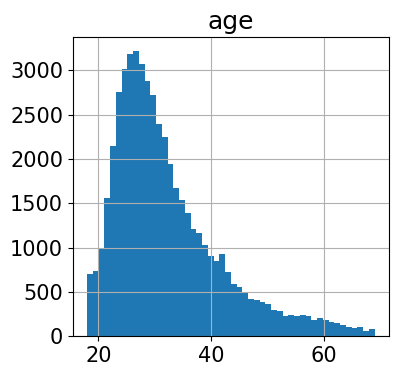

In [170]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

# Określenie liczby kolumn i wierszy dla histogramów
n_rows = (len(okcupid4.columns) + 3) // 4  # Zaokrąglenie w górę
n_cols = 4

# Wyświetlanie histogramów
okcupid4.hist(bins=50, figsize=(20, 5 * n_rows), layout=(n_rows, n_cols))
plt.show()

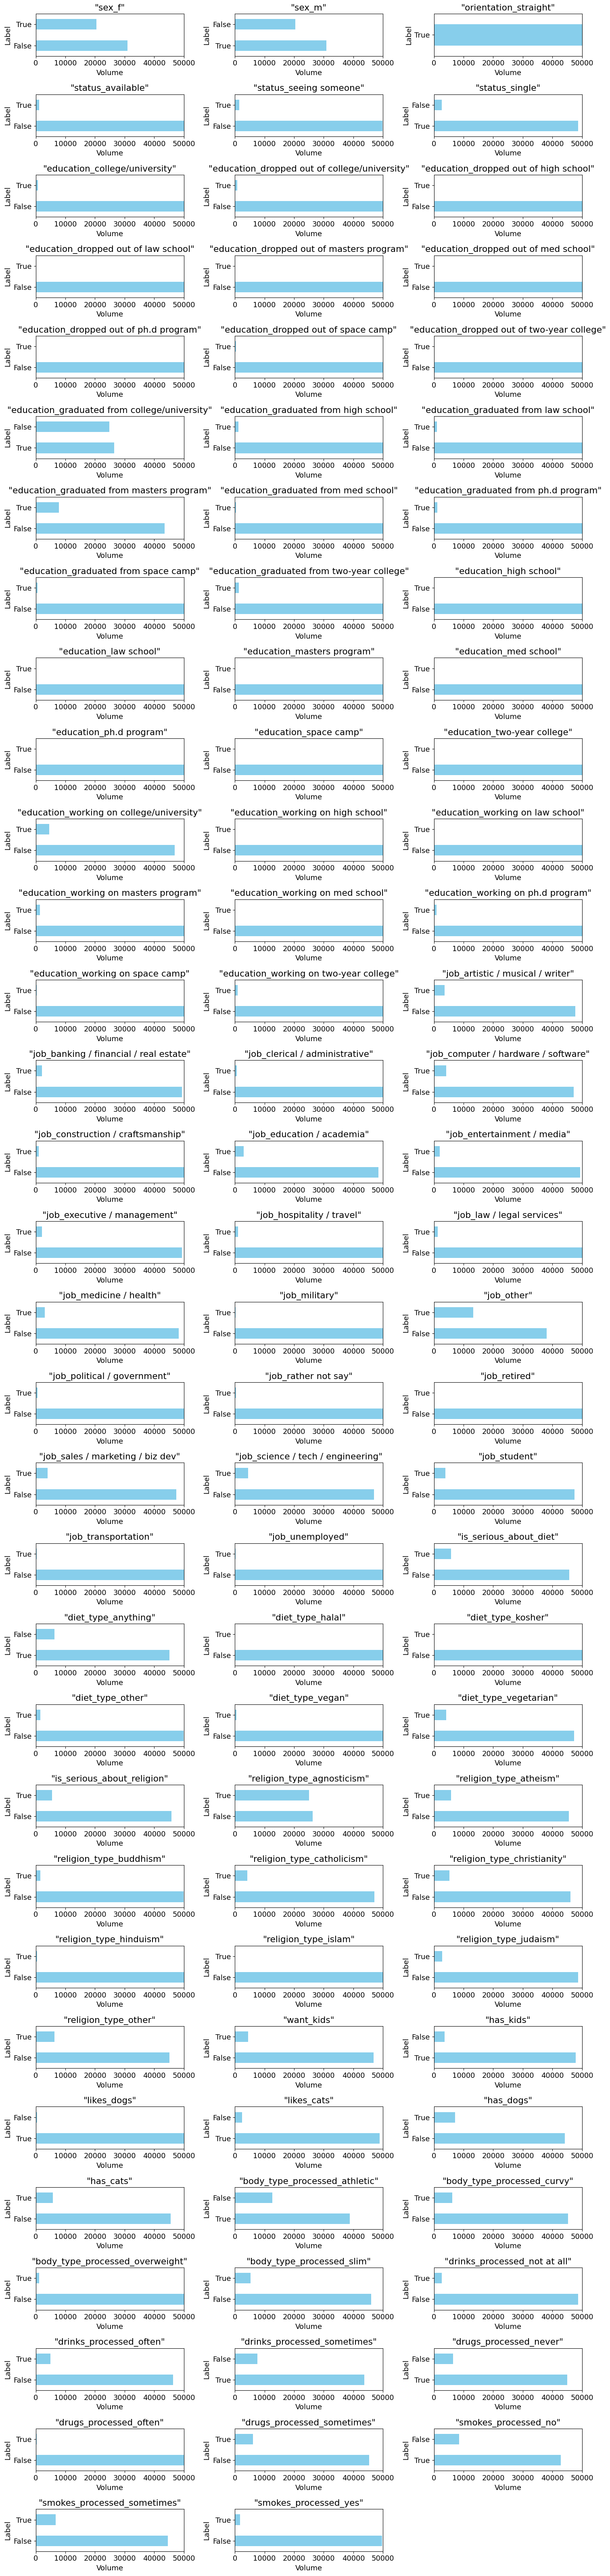

In [191]:
import matplotlib.pyplot as plt

# Kolumny typu bool
object_columns = okcupid4.select_dtypes(include=['bool'])

plt.rcParams.update({'font.size': 13})

# Określenie liczby wierszy i kolumn dla wykresów
n_rows = len(object_columns.columns) // 3 + (len(object_columns.columns) % 3 > 0)  # Zaokrąglenie w górę

# Tworzymy wykresy słupkowe dla każdej z wybranych kolumn
fig, axs = plt.subplots(n_rows, 3, figsize=(15, 2 * n_rows))  # Zmniejszenie wysokości osi Y o połowę
axs = axs.flatten()  # Spłaszczanie osi wykresów do jednego wymiaru

for i, column in enumerate(object_columns.columns):
    if len(object_columns[column].unique()) <= 50:
        value_counts = object_columns[column].value_counts()
    else:
        value_counts = object_columns[column].value_counts()[:50]

    ax = axs[i]  # Wybieranie odpowiedniej osi wykresu
    value_counts.plot(kind='barh', color='skyblue', ax=ax, width=0.5)  # Zmniejszenie szerokości słupków o połowę
    ax.set_title(f'"{column}"')
    ax.set_xlabel('Volume')
    ax.set_ylabel('Label')
    ax.set_xlim(0, 50000)  # Ograniczenie osi X do 50000

    # Ustalanie etykiet osi Y w zależności od występowania wartości True i False
    if 'False' in value_counts.index and 'True' in value_counts.index:
        ax.set_yticklabels(['False', 'True'], fontsize=10)
    elif 'False' in value_counts.index:
        ax.set_yticklabels(['False'], fontsize=10)
    elif 'True' in value_counts.index:
        ax.set_yticklabels(['True'], fontsize=10)

    # Usuwanie nieużywanych osi wykresów
    if i >= len(object_columns.columns) - 1:
        for j in range(i + 1, n_rows * 3):
            axs[j].remove()

plt.tight_layout()  # Dostosowanie układu
plt.show()


In [192]:
#Checkpoint - kopiowanie danych przed rozpoczęciem kolejnych operacji
okcupid5 = okcupid4.copy()

In [193]:
#5. Budowa modeli

In [194]:
#Kod budowany wg. schematu w książce "Python i praca z danymi, rodział 11"

In [195]:
#Przeprowadzenie PCA
import numpy as np
from scipy import linalg as la

data = np.array(okcupid5)

In [196]:
# Sprawdzenie typu danych i kształtu tablicy data
print(type(data))
print(data.shape)

# Upewnienie się, że dane są typu float
data = data.astype(float)

<class 'numpy.ndarray'>
(51370, 96)


In [197]:
#Sprawdzenie jak wyglądają dane po operacji astype
print(type(data))

<class 'numpy.ndarray'>


In [198]:
#Macierz kowariancji
#Wyśrodkowanie danych
data -= data.mean(axis=0)
cov = np.cov(data, rowvar=False)

In [199]:
#Obliczanie wartości własnych i wektora macierzy kowariancji
evals, evecs = la.eig(cov)

In [200]:
#Mnoży macierz pierwotnych danych przez macierz wektora własnego

#Sortuje wartości własne i wektory własne, po czym wybiera składowe
num_components=2
sorted_key = np.argsort(evals)[::-1][:num_components]
evals, evecs = evals[sorted_key], evecs[:, sorted_key]

In [201]:
print("Wartości własne:", evals)

Wartości własne: [89.8315281 +0.j  0.52651733+0.j]


In [ ]:
print("Wektory własne:", evecs)

In [203]:
#Mnoży pierwotne dane przez wektory własne
principal_components=np.dot(data,evecs)
print("Głowne składowe:", principal_components)

Głowne składowe: [[-10.5088841 +0.j  -0.20654705+0.j]
 [  2.49639352+0.j  -0.74972091+0.j]
 [  5.51042485+0.j  -0.18769746+0.j]
 ...
 [ -8.5091144 +0.j  -0.72453023+0.j]
 [  9.51708853+0.j  -0.63636073+0.j]
 [ -5.51177491+0.j  -0.66577111+0.j]]


In [204]:
#Pomocnicze ograniczenie wyświetlanej ilości wierszy

pd.set_option('display.max_rows', 10)

In [205]:
#Analiza głównych składowych przy użyciu biblioteki scikit-learn
import pandas as pd
from sklearn.decomposition import PCA

data=np.array(okcupid5)

#Tworzy i dopasowuje model PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data = components,
                             columns = ['główna_składowa_1', 'główna_składowa_2'])
print(components_df)

       główna_składowa_1  główna_składowa_2
0             -10.508884          -0.206547
1               2.496394          -0.749718
2               5.510425          -0.187700
3              -9.501751          -0.103452
4              -3.492555          -0.623287
...                  ...                ...
51365          -1.489048           0.768137
51366          26.523822           0.615146
51367          -8.509114          -0.724528
51368           9.517089          -0.636359
51369          -5.511775          -0.665770

[51370 rows x 2 columns]


In [206]:
#Analiza skupień

In [207]:
#5.1 Wyznaczanie liczby skupień

In [208]:
#Metoda łokcia

In [209]:
#Sprawdzenie czy ramka, do usunięcia potem
print(okcupid5.shape)

(51370, 96)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

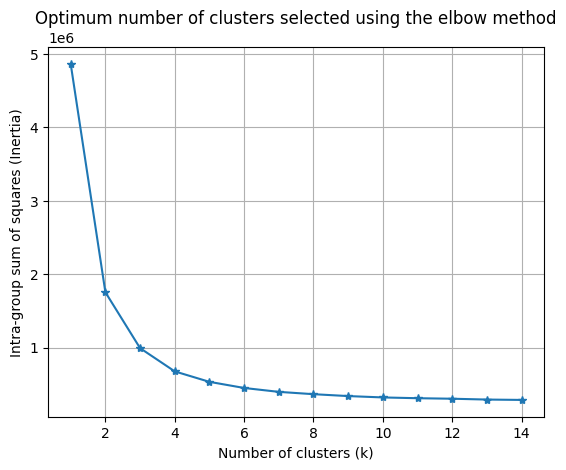

In [210]:
#Metoda Łokcia
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

data = okcupid5
wcss_list = []

for i in range (1, 15):
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    #Dodanie wskaźnika WCSS (bezwładność) skupień do score_list
    wcss_list.append(kmeans_model.inertia_)

plt.rcParams.update({'font.size': 10})

#Bezwładność
plt.plot(range(1, 15), wcss_list, marker='*')

#Tytuły wykresu
plt.title('Optimum number of clusters selected using the elbow method')

#Wyznacza etykietę osi x
plt.xlabel('Number of clusters (k)')

#Wyznacza etykietę osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

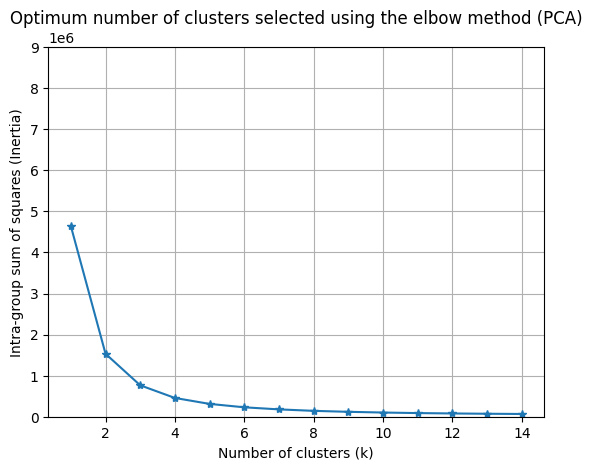

In [212]:
#Metoda Łokcia z PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = components_df  # Składowe PCA

wcss_list = []

for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data)
    # Dodanie WCSS do listy
    wcss_list.append(kmeans_model.inertia_)

# Wykres WCSS
plt.plot(range(1, 15), wcss_list, marker='*')

# Tytuł wykresu
plt.title('Optimum number of clusters selected using the elbow method (PCA)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Ustawienie zakresu osi y
plt.ylim(0, 9e6)

# Etykieta osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

# Dodanie siatki
plt.grid(True)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

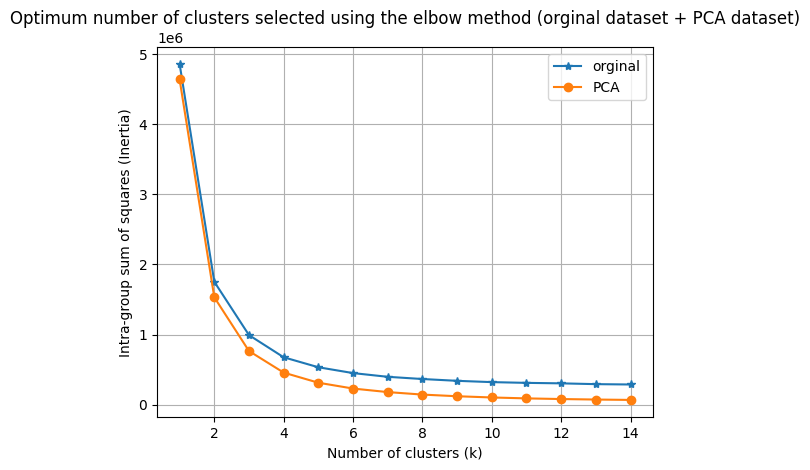

In [211]:
#Nałożenie na siebie obu wykresów Metody Łokcia
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Dane pierwotne
data_original = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data_original)

# Metoda łokcia dla danych pierwotnych
wcss_list_original = []
for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data_original)
    wcss_list_original.append(kmeans_model.inertia_)

# Metoda łokcia dla danych po PCA
wcss_list_pca = []
for i in range(1, 15):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(components)
    wcss_list_pca.append(kmeans_model.inertia_)

# Wykres metody łokcia dla danych pierwotnych
plt.plot(range(1, 15), wcss_list_original, marker='*', label='orginal')

# Wykres metody łokcia dla danych po PCA
plt.plot(range(1, 15), wcss_list_pca, marker='o', label='PCA')

# Tytuł wykresu
plt.title('Optimum number of clusters selected using the elbow method (orginal dataset + PCA dataset)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Etykieta osi y
plt.ylabel('Intra-group sum of squares (Inertia)')

# Legenda
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

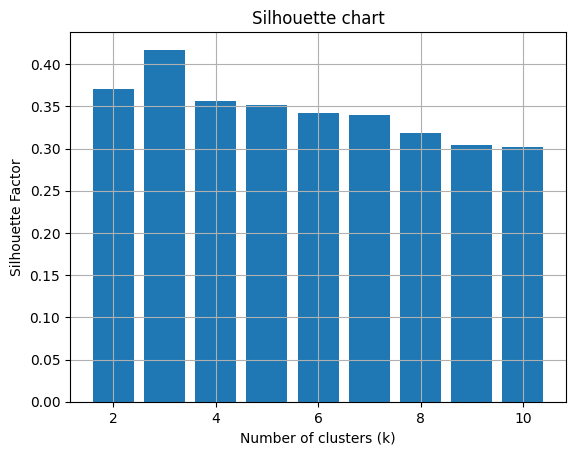

In [ ]:
#Uwaga na ten kod - długo się wykonuje
#Metoda Profilu
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

#Import wskaźnika profilu
from sklearn.metrics import silhouette_score

data = okcupid5
score_list = []

for i in range (2, 11):
    kmeans_model = KMeans(n_clusters = i, random_state = 123)
    kmeans_model.fit(data)
    #Uzyskuje przewidywania
    pred=kmeans_model.predict(data)
    #Obliczanie wskaźnika profilu
    score = silhouette_score(data, pred, metric='euclidean')

    #Dodaje wskaźnik profilu skupień do score_list
    score_list.append(score)

#Wykres współczynnika profilu w funkcji liczby skupień
plt.bar(range(2, 11), score_list)

#Wyznacza tytuł wykresu
plt.title('Silhouette chart')

#Wyznacza etykietę osi x
plt.xlabel('Number of clusters (k)')

#Wyznacza etykietę osi y
plt.ylabel('Silhouette Factor')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

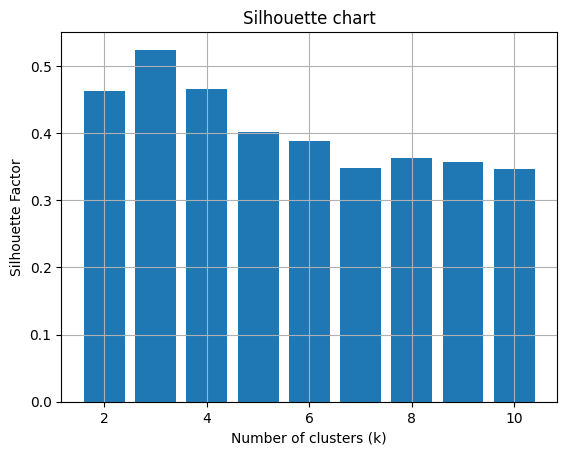

In [ ]:
#Uwaga na ten kod - długo się wykonuje
#Metoda profilu po PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Import wskaźnika profilu
from sklearn.metrics import silhouette_score

data = components_df  # Składowe PCA
score_list = []

for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data)
    # Uzyskanie przewidywań
    pred = kmeans_model.predict(data)
    # Obliczenie wskaźnika profilu
    score = silhouette_score(data, pred, metric='euclidean')

    # Dodanie wskaźnika profilu skupień do score_list
    score_list.append(score)

# Wykres współczynnika profilu w funkcji liczby skupień
plt.bar(range(2, 11), score_list)

# Wyznaczenie tytułu wykresu
plt.title('Silhouette chart')

# Wyznaczenie etykiety osi x
plt.xlabel('Number of clusters (k)')

# Wyznaczenie etykiety osi y
plt.ylabel('Silhouette Factor')

# Dodanie siatki na wykresie
plt.grid(True)

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

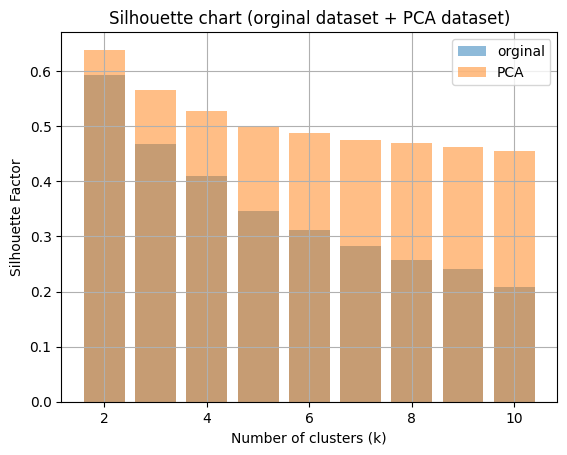

In [213]:
#Uwaga na ten kod - długo się wykonuje
#Nałożenie na siebie obu wykresów Profilu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Dane pierwotne
data_original = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data_original)

# Metoda Profilu dla danych pierwotnych
score_list_original = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(data_original)
    pred = kmeans_model.predict(data_original)
    score = silhouette_score(data_original, pred, metric='euclidean')
    score_list_original.append(score)

# Metoda Profilu dla danych po PCA
score_list_pca = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=123)
    kmeans_model.fit(components)
    pred = kmeans_model.predict(components)
    score = silhouette_score(components, pred, metric='euclidean')
    score_list_pca.append(score)

# Wykres metody Profilu dla danych pierwotnych
plt.bar(range(2, 11), score_list_original, alpha=0.5, label='orginal')

# Wykres metody Profilu dla danych po PCA
plt.bar(range(2, 11), score_list_pca, alpha=0.5, label='PCA')

# Tytuł wykresu
plt.title('Silhouette chart (orginal dataset + PCA dataset)')

# Etykieta osi x
plt.xlabel('Number of clusters (k)')

# Etykieta osi y
plt.ylabel('Silhouette Factor')

# Legenda
plt.legend()

# Dodanie siatki
plt.grid(True)

plt.show()


In [216]:
#4.3 Metoda k-średnich (k-means)/centroidów
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

data = okcupid5

#Definiowanie liczby skupień
num_clusters = 2

#Tworzy i dopasowuje model KMeans
km = KMeans(n_clusters=num_clusters)
km.fit(data)

#Przewiduje zmienną docelową
pred=km.predict(data)

#Tworzy wykres skupień
#plt.scatter(data.iloc[:, 0], data.iloc[:, 8], c=pred, marker="o", cmap="bwr_r")


# Przewidywanie przynależności do skupienia dla każdego punktu danych
#cluster_labels = kmeans_model.predict(data)

# Wyświetlenie wyników analizy skupień
print(pred)

#Wyznacza tytuł wykresu
#plt.title('Analiza skupień metodą centroidów')

#Wyznacza etykietę osi x
#plt.xlabel('Wartość osi x')

#Wyznacza etykietę osi y
#plt.ylabel('Wartość osi y')

#Dodanie siatki na wykresie
#plt.grid(True)

#plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 0 ... 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


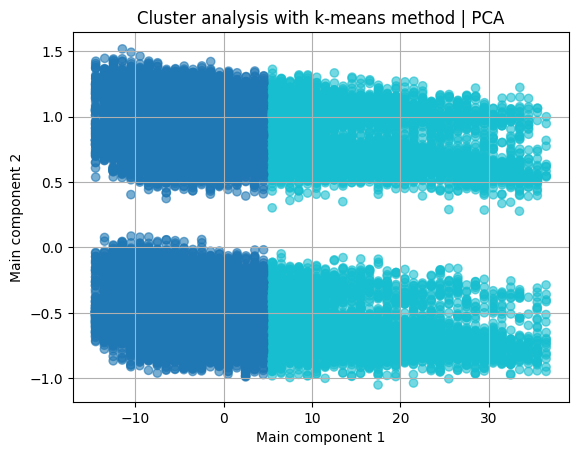

In [217]:
#Z użyciem PCA
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Definiowanie liczby skupień
num_clusters = 2

# Tworzy i dopasowuje model KMeans
km = KMeans(n_clusters=num_clusters) #unikanie losowości, random_state=42 - nie jest konieczne?
km.fit(components)

# Przewiduje zmienną docelową
pred_km = km.predict(components)

# Tworzy wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_km, marker="o", cmap="tab10", alpha=0.6)
plt.title('Cluster analysis with k-means method | PCA')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

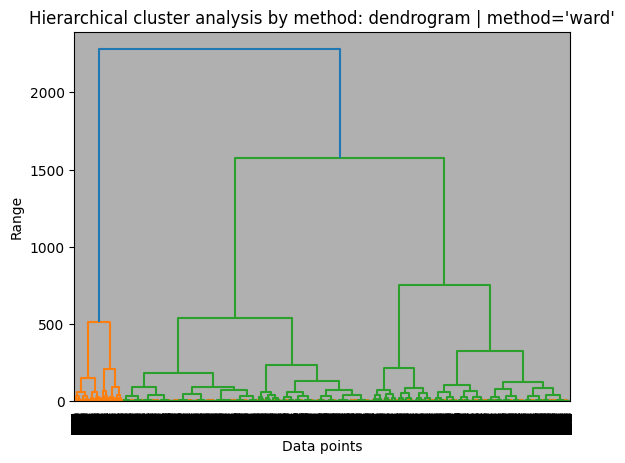

In [218]:
#Uwaga, wykonuje się ponad 15 minut!
#5.3 Hierarchiczna analiza skupień
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

data=components_df

# Dodanie kolorów klastrów
color_threshold = 2.5  # Próg kolorowania klastrów
for i, color in zip(range(1, num_clusters + 1), plt.cm.tab10.colors):
    plt.axhline(y=color_threshold * i, color=color, linestyle='--')

#Tworzy dendrogram za pomocą wiązania Warda
dendrogram_plot = dendrogram(linkage(data, method='ward'))

#Wyznacza tytuł wykresu
plt.title("Hierarchical cluster analysis by method: dendrogram | method='ward'")

#Wyznacza etykietę osi x
plt.xlabel('Data points')

#Wyznacza etykietę osi y
plt.ylabel('Range')

#Dodanie siatki na wykresie
plt.grid(True)

plt.show()

In [219]:
#Aglomeracyjna analiza skupień
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data=okcupid5

#Wyznacza liczbę skupień
num_clusters=2

#Model aglomeracyjny analizy skupień
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

#Dopasowuje model aglomeracyjnej analizy skupień
ac.fit(data)

#Przewidywanie zmiennej docelowej
pred=ac.fit_predict(data)

print(pred)

[0 0 0 ... 0 1 0]


Initial data rows:
   główna_składowa_1  główna_składowa_2
0         -10.508884          -0.206547
1           2.496394          -0.749718
2           5.510425          -0.187700
3          -9.501751          -0.103452
4          -3.492555          -0.623287

Column data types:
główna_składowa_1    float64
główna_składowa_2    float64
dtype: object

Missing values:
główna_składowa_1    0
główna_składowa_2    0
dtype: int64

DataFrame indexes:
RangeIndex(start=0, stop=51370, step=1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


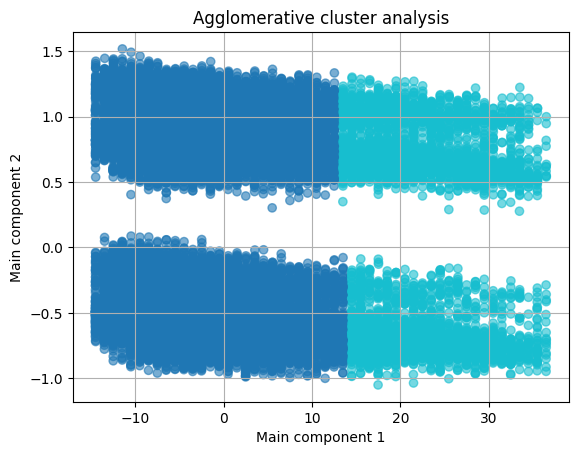

In [220]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Wczytanie danych z PCA (components_df)
data = components_df

# 1. Wyświetlenie początkowych wierszy danych
print("Initial data rows:")
print(data.head())

# 2. Sprawdzenie typów danych kolumn
print("\nColumn data types:")
print(data.dtypes)

# 3. Sprawdzenie brakujących wartości
print("\nMissing values:")
print(data.isnull().sum())

# 4. Sprawdzenie indeksów DataFrame
print("\nDataFrame indexes:")
print(data.index)

# Wyznaczenie liczby skupień
num_clusters = 2

# Wybór losowych punktów startowych
random_indices = np.random.choice(len(data), num_clusters, replace=False)
random_centers = data.values[random_indices]

# Model aglomeracyjny analizy skupień z losowym inicjowaniem
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward', affinity='euclidean',
                             compute_full_tree='auto', connectivity=None, distance_threshold=None)

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Agglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()


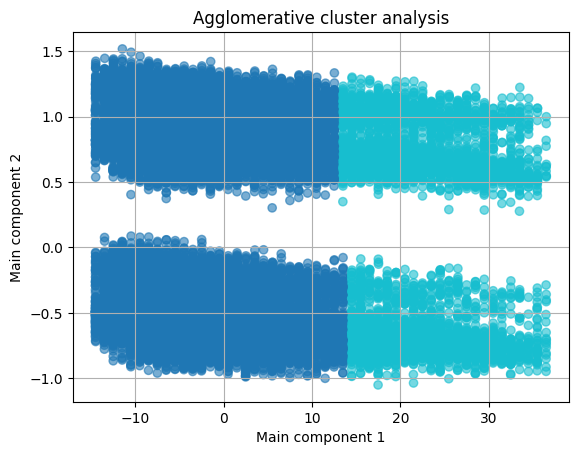

In [221]:
# Agglomeracyjna analiza skupień
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Wczytanie danych z PCA (components_df)
data = components_df

# Wyznaczenie liczby skupień
num_clusters = 2

# Model aglomeracyjny analizy skupień
ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Agglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [222]:
#Deglomeracyjna analiza skupień
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

data = okcupid5

# Wyznaczenie liczby skupień
num_clusters = 2

# Model deglomeracyjny analizy skupień
ac_deg = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

# Dopasowanie modelu deglomeracyjnej analizy skupień
ac_deg.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac_deg.fit_predict(data)

print(pred)

[1 1 1 ... 1 0 1]


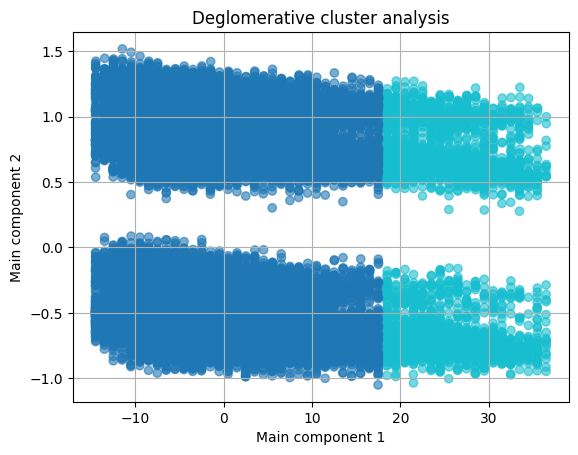

In [223]:
#Deglomeracyjna analiza skupień po PCA
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

# Wczytanie danych z PCA (components_df)
data = components_df

# Wyznaczenie liczby skupień
num_clusters = 2

# Model aglomeracyjny analizy skupień
ac_deg = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac_deg.fit(data)

# Przewidywanie zmiennej docelowej
pred = ac_deg.fit_predict(data)

plt.scatter(components[:, 0], components[:, 1], c=pred, marker="o", cmap="tab10", alpha=0.6)
plt.title('Deglomerative cluster analysis')
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

In [229]:
#5.5 DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

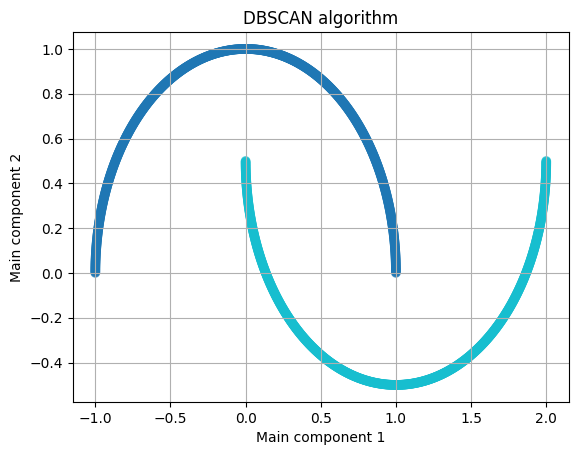

In [225]:
#biblioteki
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

#import zestawu danych make_moons
from sklearn.datasets import make_moons

#Generowanie losowych danych w kształcie sierpowatym
features, label = make_moons(n_samples=2000)

#Tworzenie modelu DBSCAN
db=DBSCAN()

db.fit(features)

pred_label=db.fit_predict(features)

#Wykres skupień
plt.scatter(features[:,0], features[:,1], c=pred_label, marker="o", cmap="tab10", alpha=0.6)

#Wyznaczanie tytułu wykresu
plt.title("DBSCAN algorithm")
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

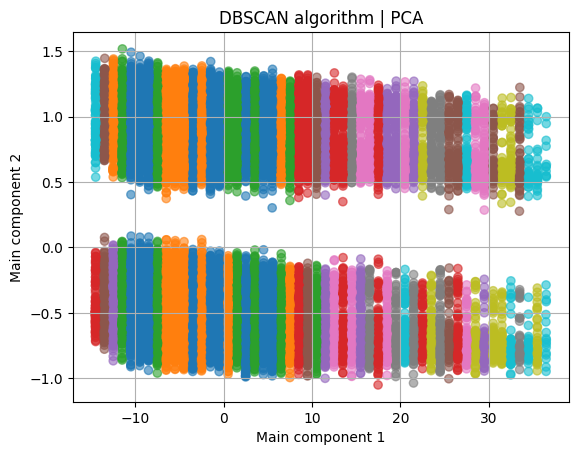

In [226]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

# Tworzenie modelu DBSCAN
db = DBSCAN()

# Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(components)

pred_label = db.fit_predict(components)

# Wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_label, marker="o", cmap="tab10", alpha=0.6)
plt.title("DBSCAN algorithm | PCA")
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)
plt.show()

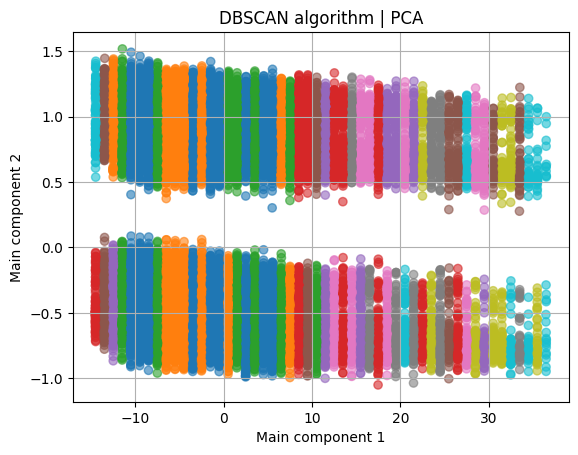

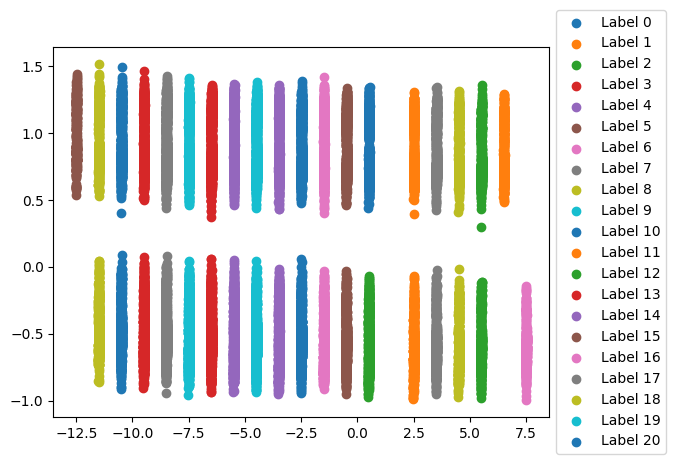

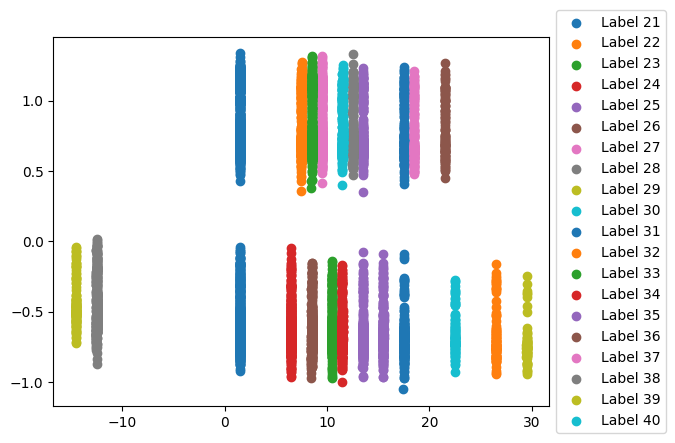

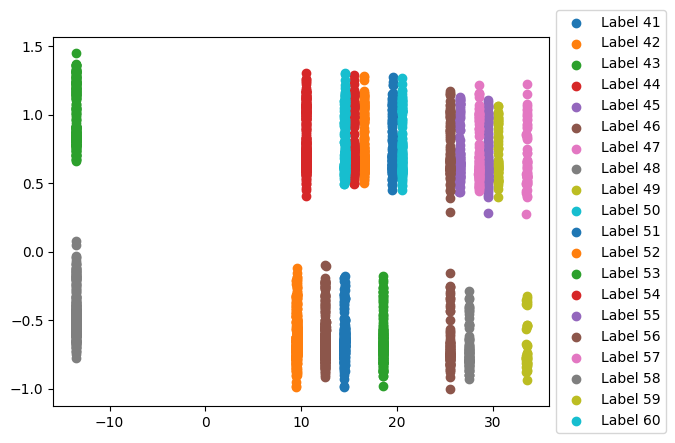

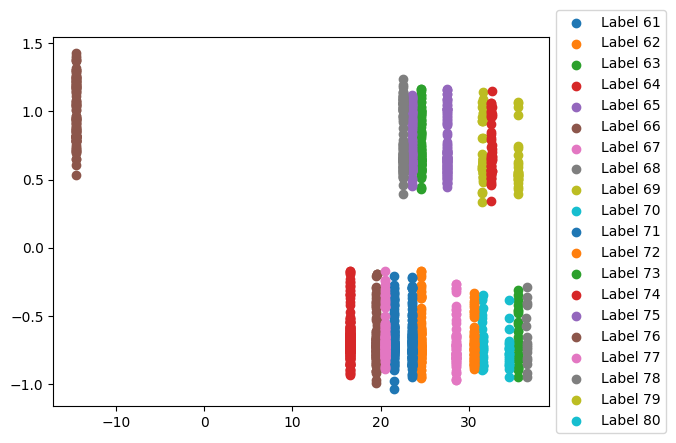

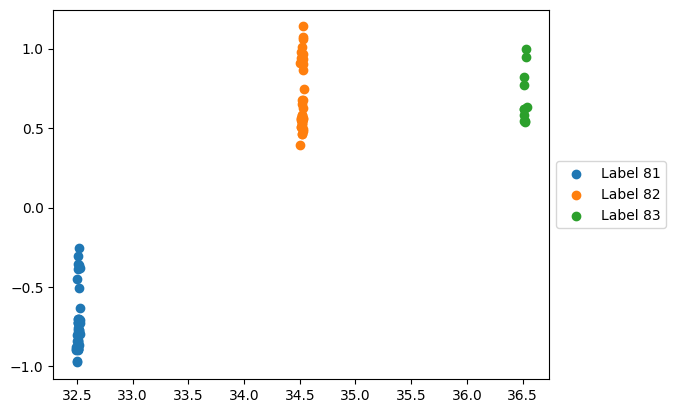

In [227]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

data = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
pca_model = PCA(n_components=2)
components = pca_model.fit_transform(data)
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

# Tworzenie modelu DBSCAN
db = DBSCAN()

# Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(components)

pred_label = db.fit_predict(components)

# Wykres skupień
plt.scatter(components[:, 0], components[:, 1], c=pred_label, marker="o", cmap="tab10", alpha=0.6)
plt.title("DBSCAN algorithm | PCA")
plt.xlabel('Main component 1')
plt.ylabel('Main component 2')
plt.grid(True)

# Zapisujemy etykiety
labels = np.unique(pred_label)

# Tworzymy osobny rysunek dla etykiet
fig, ax = plt.subplots()

# Umieszczamy etykiety na wykresie
for i, label in enumerate(labels):
    if label != -1:
        indices = pred_label == label
        x = components[indices, 0]
        y = components[indices, 1]
        ax.scatter(x, y, label=f'Label {label}')
    elif i == 0:
        indices = pred_label == label
        x = components[indices, 0]
        y = components[indices, 1]
        ax.scatter(x, y, label=f'Noise')

    # Zawijanie listy co 20 etykiet
    if i % 20 == 0 and i != 0:
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
        fig, ax = plt.subplots()

# Dodajemy legendę na końcu
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [228]:
#Ocenianie jakości analizy skupień

In [230]:
import pandas as pd

#dataset = components
components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

print(components_df.head())

   główna_składowa_1  główna_składowa_2
0         -10.508884          -0.206555
1           2.496394          -0.749719
2           5.510425          -0.187694
3          -9.501751          -0.103448
4          -3.492555          -0.623287


In [231]:
#components = pca_model.fit_transform(data)
#components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

In [232]:
feature_set = ['główna_składowa_1']

features = components_df[feature_set]

target = components_df['główna_składowa_2']

In [233]:
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [234]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import fowlkes_mallows_score

In [235]:
#Dla: Metoda k-średnich (k-means)/centroidów
km.fit(feature_train)

# Przewiduje zmienną docelową
predictions_km = km.predict(feature_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [236]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_km))
print("silhouette_score:", silhouette_score(feature_test, predictions_km))

davies_bouldin_score: 0.5535305767048079
silhouette_score: 0.6457126732122764


In [237]:
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_km))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_km))

adjusted_rand_score: 6.835977863423435e-05
fowlkes_mallows_score: 0.009726038192679419


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [238]:
#Dla: Hierarchiczna analiza skupień
#feature_set = ['główna_składowa_1', 'główna_składowa_2']

#features = components_df[feature_set]

#feature_train, feature_test = train_test_split(features, test_size=0.3, random_state=1)

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac.fit(feature_train)

# Przewidywanie zmiennej docelowej
predictions_ac = ac.fit_predict(feature_test)

In [239]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_ac))
print("silhouette_score:", silhouette_score(feature_test, predictions_ac))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_ac))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_ac))

davies_bouldin_score: 0.6030003242965347
silhouette_score: 0.5994717347218261
adjusted_rand_score: 0.00010102143862191123
fowlkes_mallows_score: 0.010532190908623215


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [240]:
# Wczytanie danych z PCA (components_df)
#data = components_df

# Wyznaczenie liczby skupień
#num_clusters = 3

# Model aglomeracyjny analizy skupień
#ac = AgglomerativeClustering(n_clusters=num_clusters, linkage='average')

# Dopasowanie modelu aglomeracyjnej analizy skupień
ac_deg.fit(feature_train)

# Przewidywanie zmiennej docelowej
predictions_ac_deg = ac_deg.fit_predict(feature_test)

In [241]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_ac_deg))
print("silhouette_score:", silhouette_score(feature_test, predictions_ac_deg))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_ac_deg))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_ac_deg))

davies_bouldin_score: 0.36636540617104024
silhouette_score: 0.6601188138741213
adjusted_rand_score: 1.6479376432355118e-05
fowlkes_mallows_score: 0.008285896735048336


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and binary values for target
  warnings.warn(msg, UserWarning)


In [242]:
#Dla: DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
#data = np.array(okcupid5)

# Analiza głównych składowych przy użyciu PCA
#pca_model = PCA(n_components=2)
#components = pca_model.fit_transform(data)
#components_df = pd.DataFrame(data=components, columns=['główna_składowa_1', 'główna_składowa_2'])

# Tworzenie modelu DBSCAN
db = DBSCAN()

# Dopasowanie modelu DBSCAN do danych przetworzonych przez PCA
db.fit(feature_train)

predictions_db = db.fit_predict(feature_test)

In [243]:
#Oblicza wskaźniki wewnętrznej oceny jakości danych
print("davies_bouldin_score:", davies_bouldin_score(feature_test, predictions_db))
print("silhouette_score:", silhouette_score(feature_test, predictions_db))
#Oblicza wskaźniki zewnętrznej oceny jakości danych
print("adjusted_rand_score:", adjusted_rand_score(target_test, predictions_db))
print("fowlkes_mallows_score:", fowlkes_mallows_score(target_test, predictions_db))

davies_bouldin_score: 0.016171288531070818
silhouette_score: 0.9895596912756772
adjusted_rand_score: 0.0030372647776894983
fowlkes_mallows_score: 0.0397651490222114


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/cluster/_supervised.py:64: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
